In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.cm as cm
from collections import OrderedDict


def plot_bay(bay, move=None, move_applied=False):
    fig, ax = plt.subplots()

    # Use unique color for each unique time window
    unique_times = set(container[1] for stack in bay.values() for container in stack)
    colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

    # add hatch patterns
    hatch_patterns = ['', '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

    for i, (stack_name, stack) in enumerate(bay.items()):
        bottom = 0
        for j, (container_id, container_time) in enumerate(stack):
            # get color
            color_index = list(unique_times).index(container_time)
            color = colors[color_index]
            
            hatch = None
            if move is not None:
                if stack_name == move[0] and j == len(stack) - 1 and not move_applied: # Source stack and top container before move
                    hatch = hatch_patterns[1] # You can select different hatch patterns
                elif stack_name == move[1] and j == len(stack) - 1 and move_applied: # Destination stack and top container after move
                    hatch = hatch_patterns[2] # Different hatch pattern
                
            ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1, hatch=hatch)
            ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
            bottom += 1

    ax.set_xticks(np.arange(len(bay)))
    ax.set_xticklabels(bay.keys())
    ax.set_yticks(np.arange(4) + 0.5)
    ax.set_yticklabels([f'Tier {i+1}' for i in range(4)])

    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=True)

    ax.set_xlim(left=-0.5)

    if move is not None:
        if not move_applied:
            plt.title(f'Before Move: {move[0]} to {move[1]}')
        else:
            plt.title(f'After Move: {move[0]} to {move[1]}')
    else:
        plt.title('Initial Container Location')

    plt.show()

P=[("stack2'", "stack1'"),
   ("stack3'", "stack4'"),
   # add more moves here...
]




In [10]:
bay = {
     "stack1'": [],
  "stack2'": [("c2'", 1), ("c9'", 6)],
  "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
  "stack4'": [("c6'", 3)],
  "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
      }

P=[("stack2'", "stack1'"),
 ("stack3'", "stack4'"),
 ("stack2'", "stack1'"),
 ("stack3'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack4'", "stack3'"),
 ("stack4'", "stack3'"),
 ("stack5'", "stack4'"),
 ("stack1'", "stack3'"),
 ("stack1'", "stack4'"),
 ("stack2'", "stack1'")]


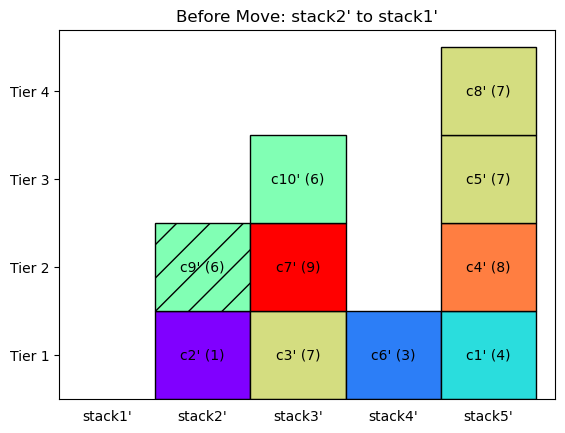

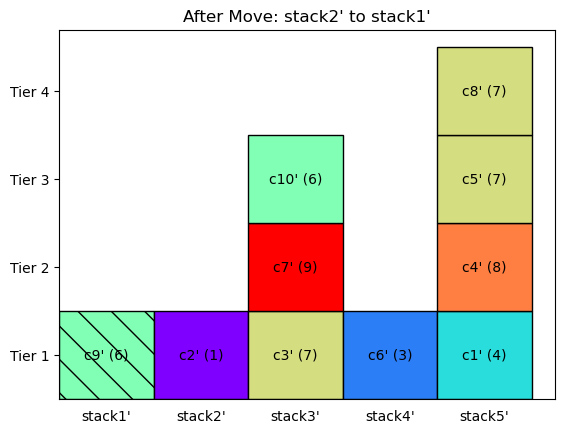

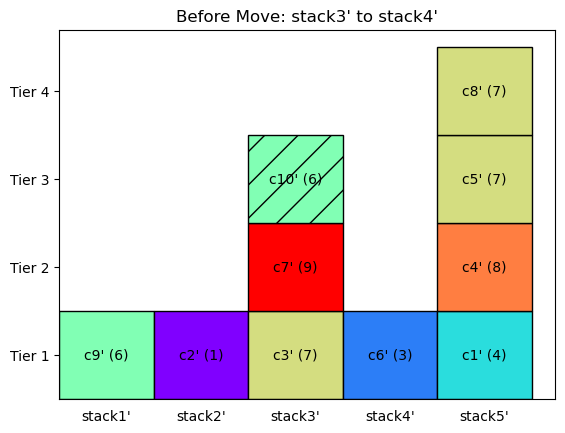

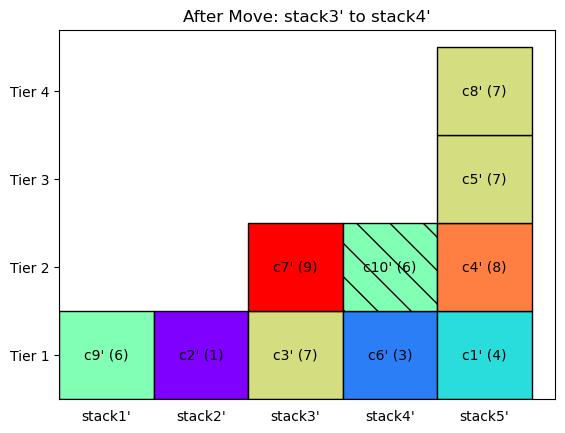

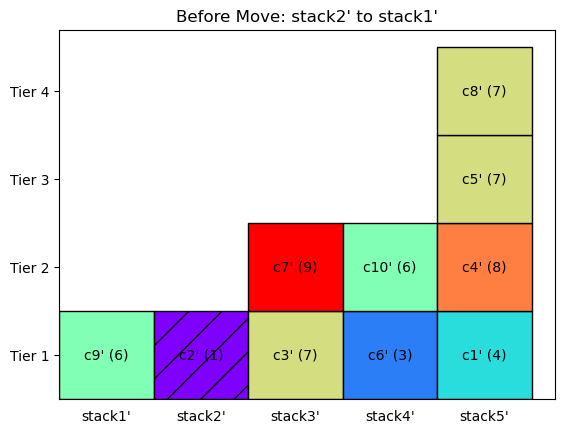

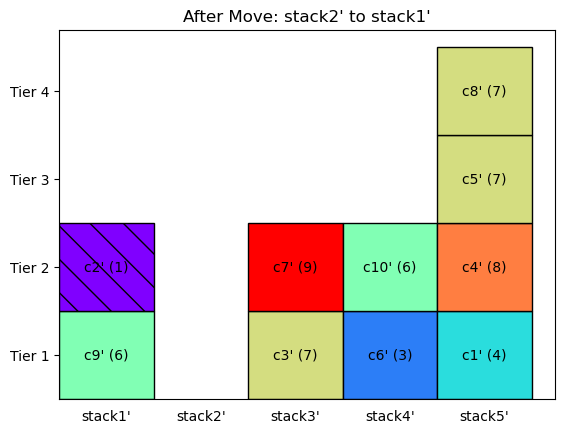

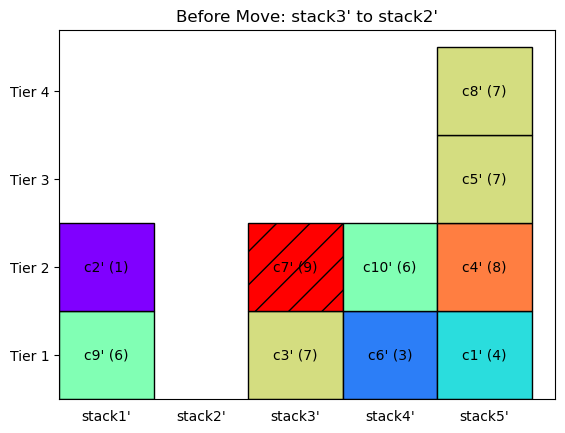

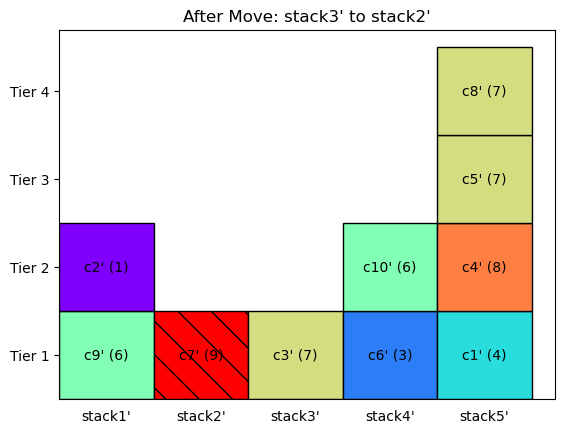

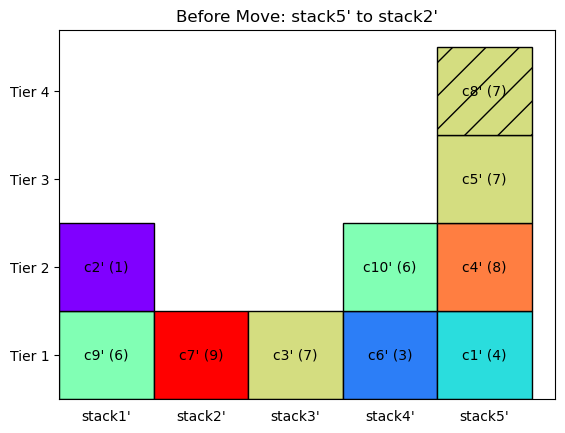

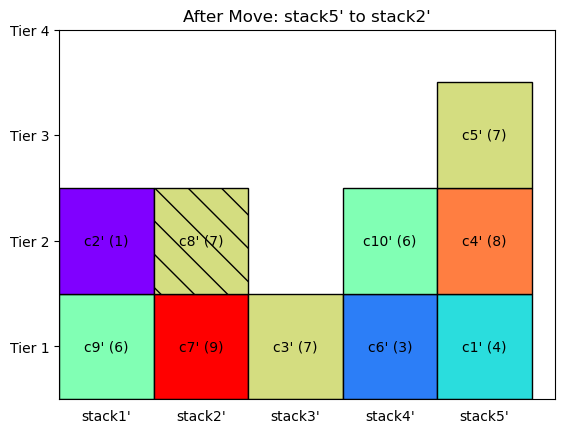

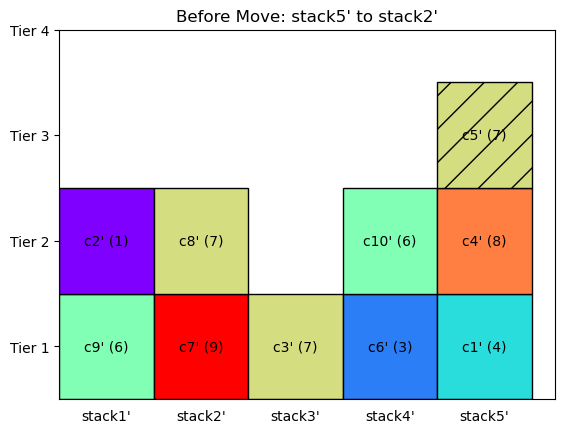

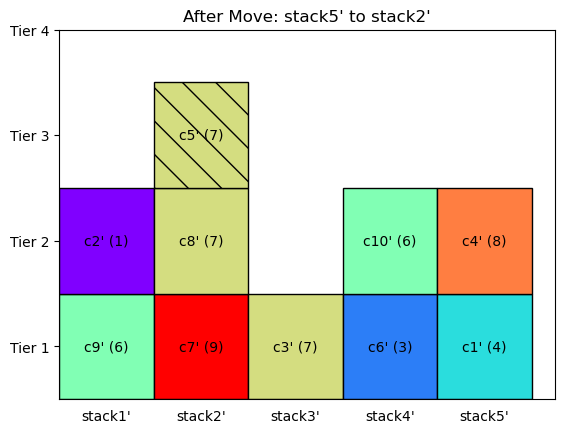

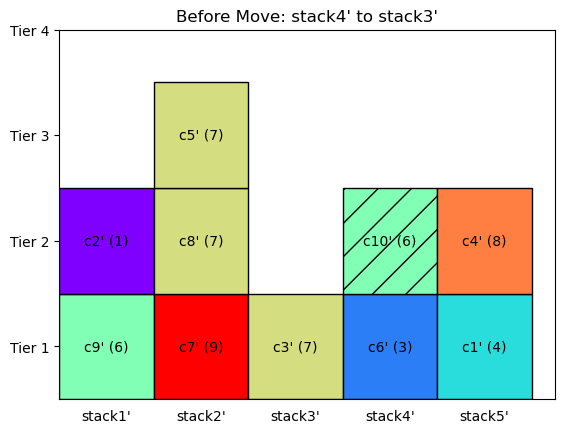

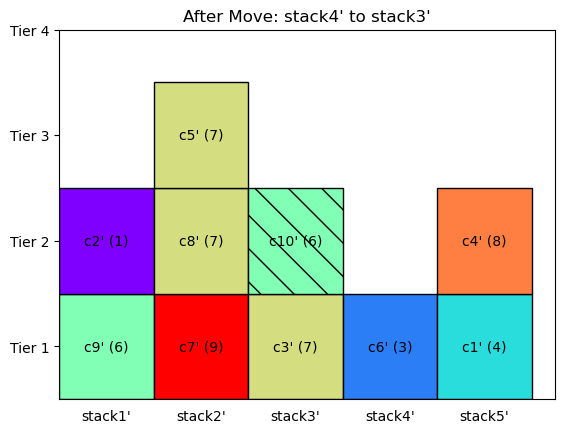

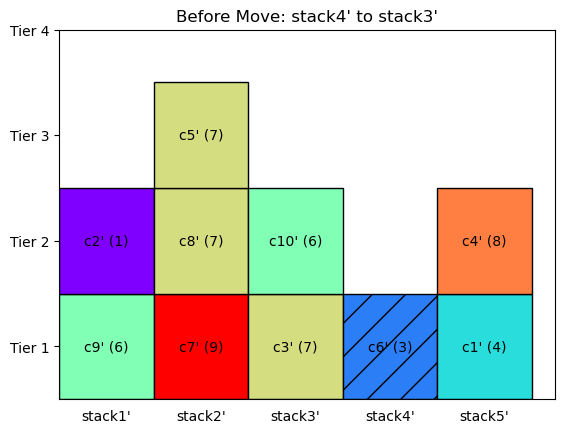

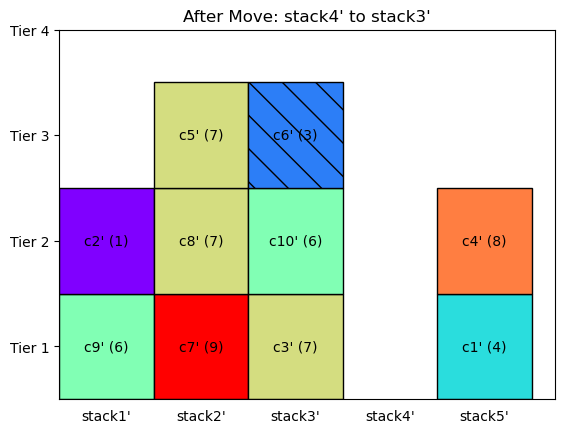

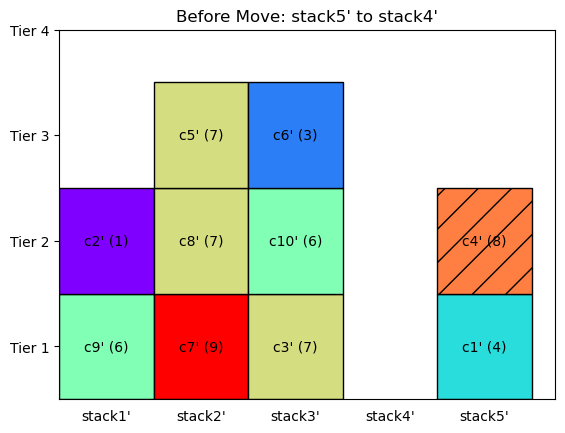

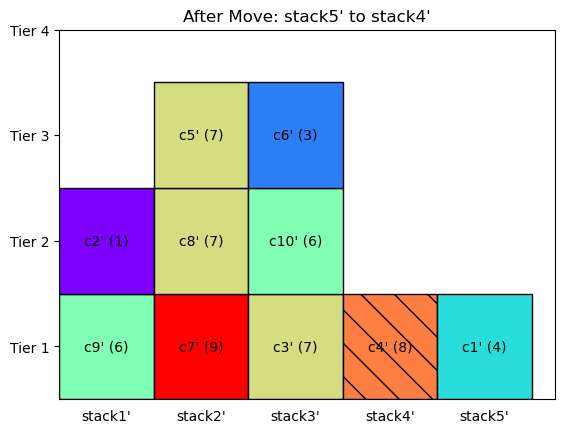

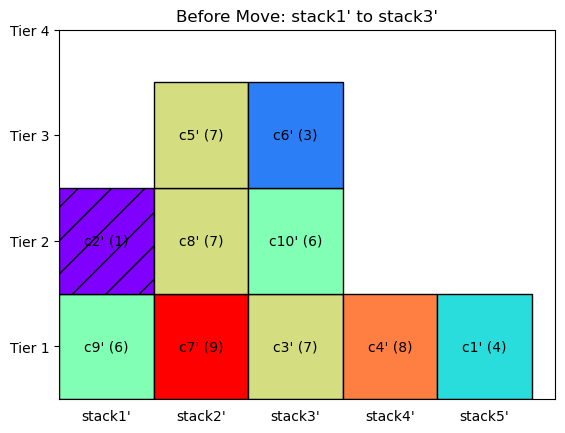

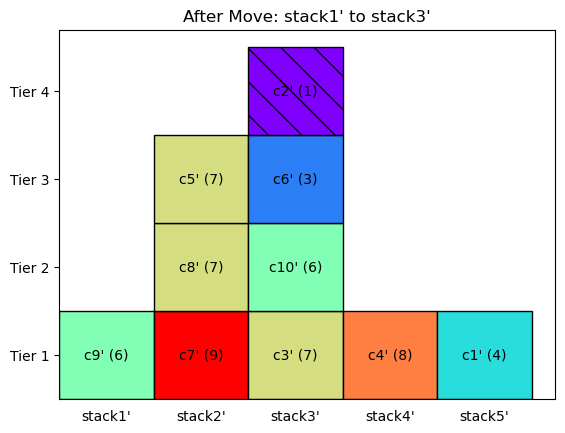

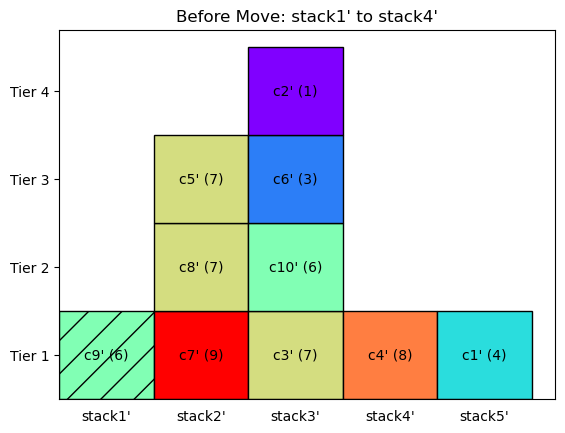

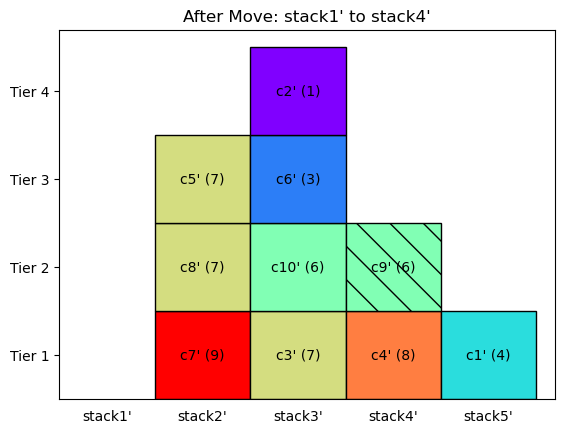

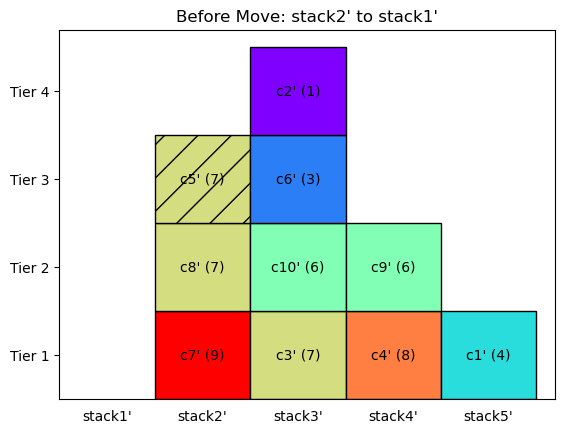

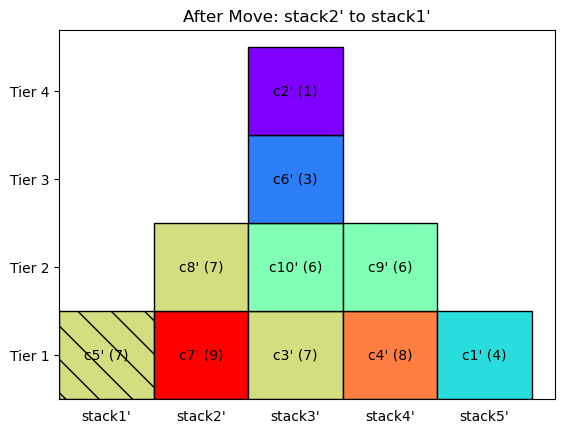

In [11]:
for move in P:
    # Visualize the bay before the move
    plot_bay(bay, move, move_applied=False)
    
    # Perform the move
    container = bay[move[0]].pop()
    bay[move[1]].append(container)
    
    # Visualize the bay after the move
    plot_bay(bay, move, move_applied=True)

In [19]:
def plot_bay(bay, move=None):
    fig, ax = plt.subplots()

    # Use unique color for each unique time window
    unique_times = set(container[1] for stack in bay.values() for container in stack)
    colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

    # add hatch patterns
    hatch_patterns = ['', '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

    for i, (stack_name, stack) in enumerate(bay.items()):
        bottom = 0
        for j, (container_id, container_time) in enumerate(stack):
            # get color
            color_index = list(unique_times).index(container_time)
            color = colors[color_index]
            
            hatch = None
            if move is not None:
                if stack_name == move[0] and j == len(stack) - 1: # Source stack and top container before move
                    hatch = hatch_patterns[1] # You can select different hatch patterns
                elif stack_name == move[1] and j == len(stack) - 1: # Destination stack and top container after move
                    hatch = hatch_patterns[2] # Different hatch pattern

            ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1, hatch=hatch)
            ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
            bottom += 1

    ax.set_xticks(np.arange(len(bay)))
    ax.set_xticklabels(bay.keys())
    ax.set_yticks(np.arange(4) + 0.5)
    ax.set_yticklabels([f'Tier {i+1}' for i in range(4)])

    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=True)

    ax.set_xlim(left=-0.5)

    if move is not None:
        plt.title(f'Move: {move[0]} to {move[1]}')
    else:
        plt.title('Initial Container Location')

    plt.show()



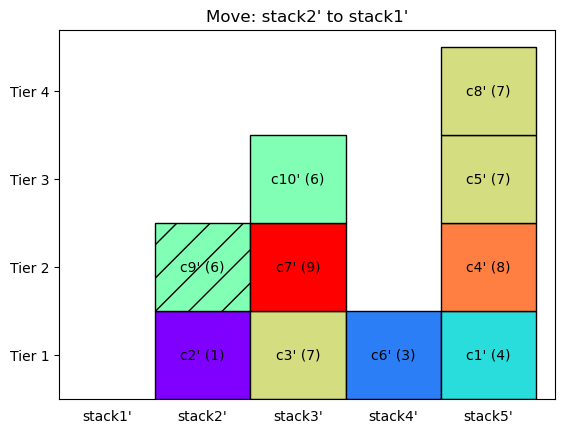

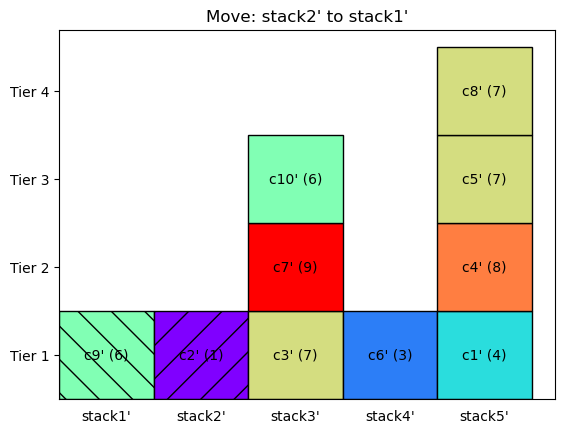

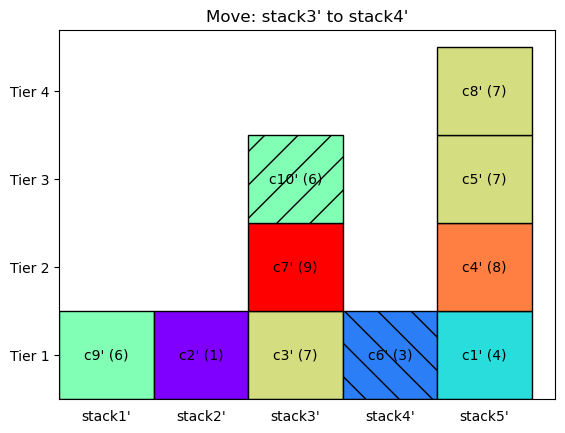

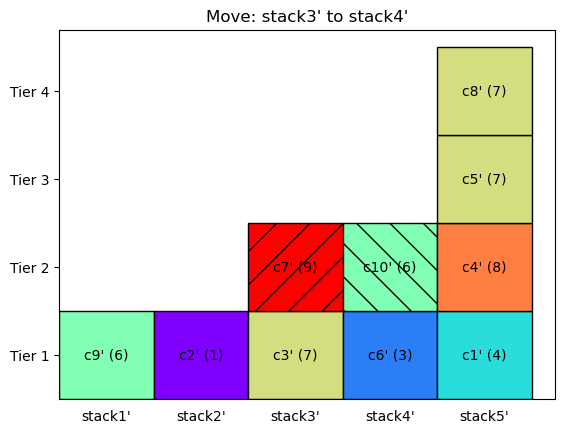

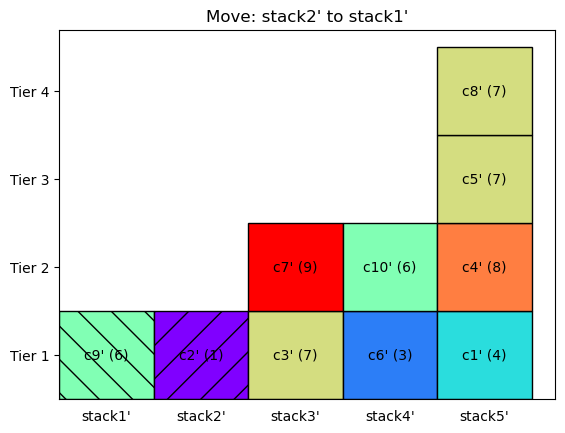

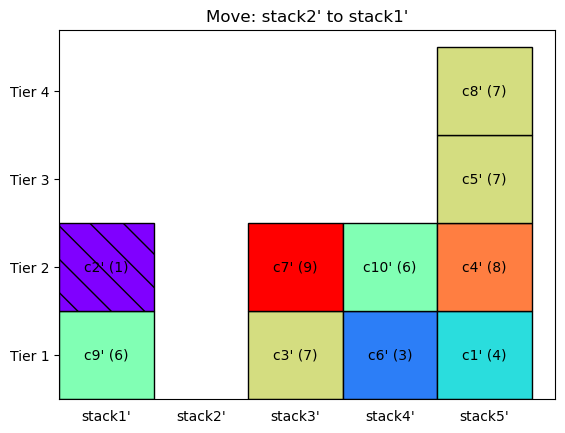

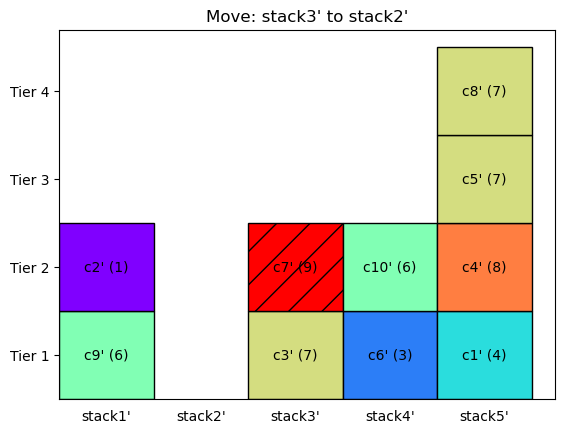

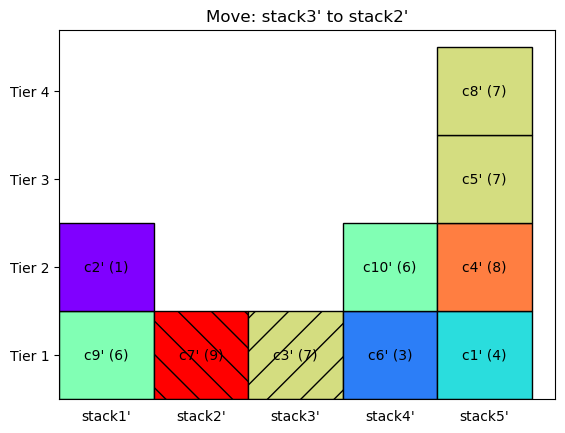

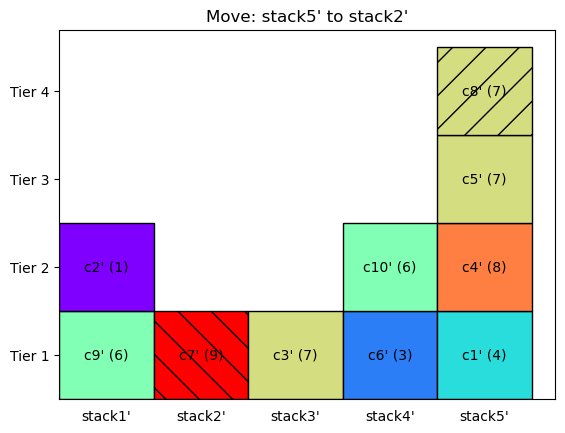

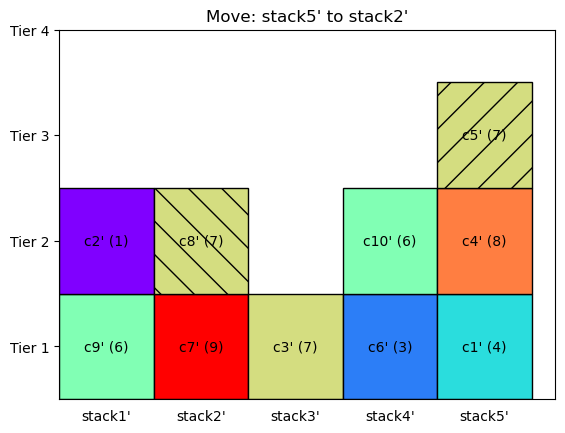

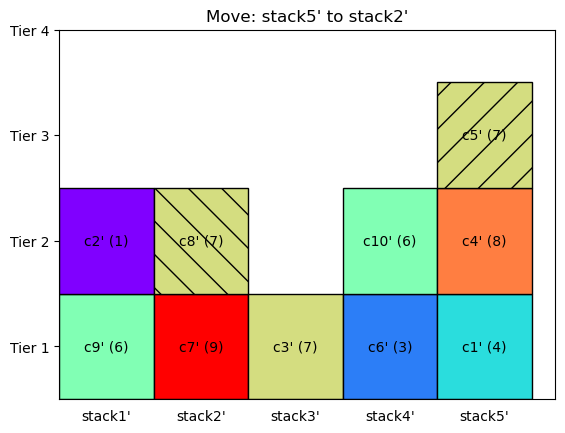

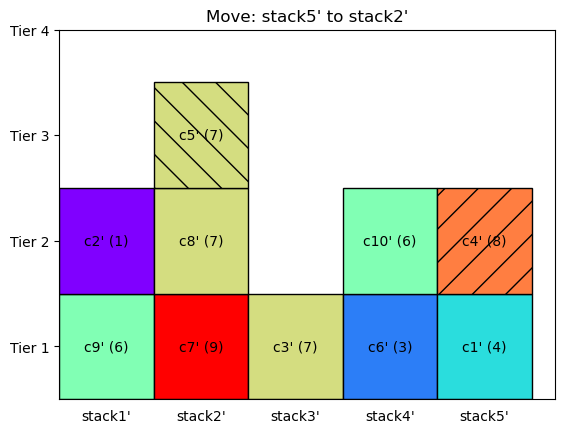

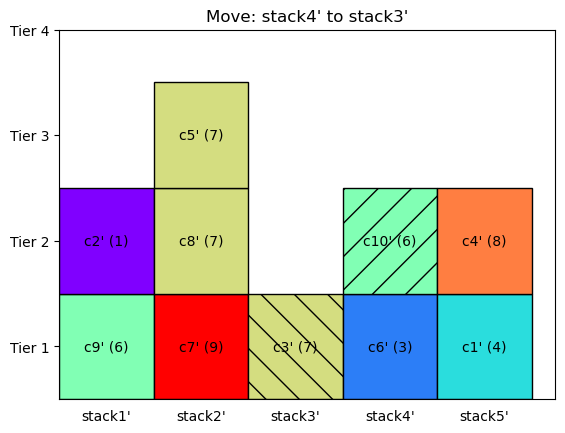

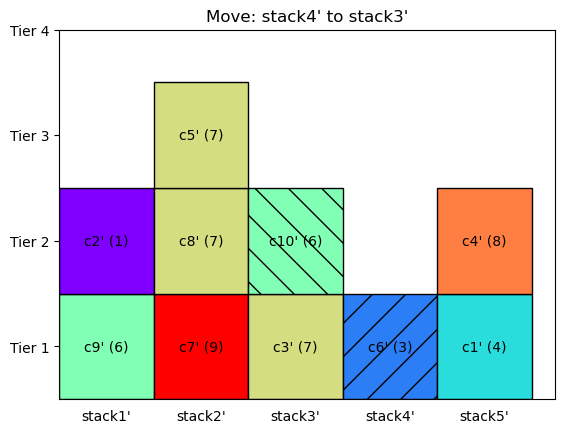

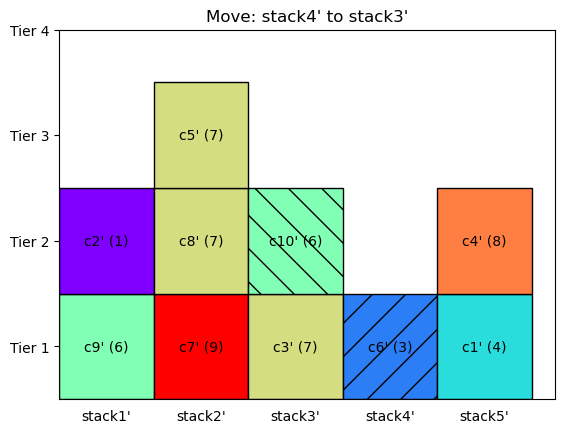

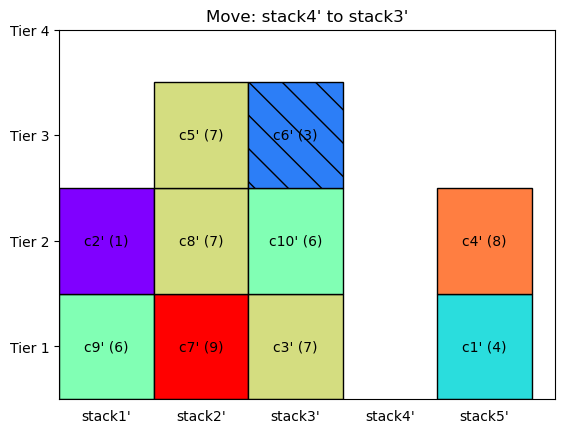

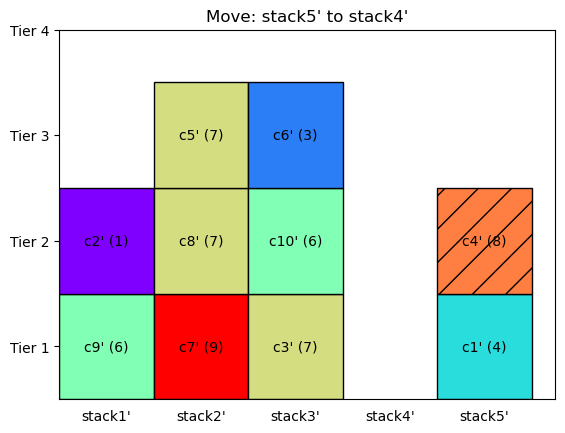

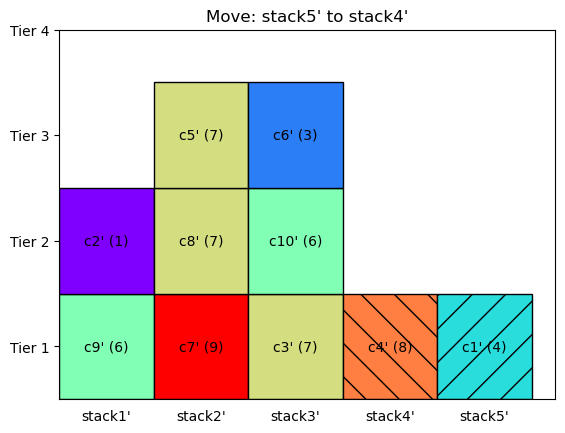

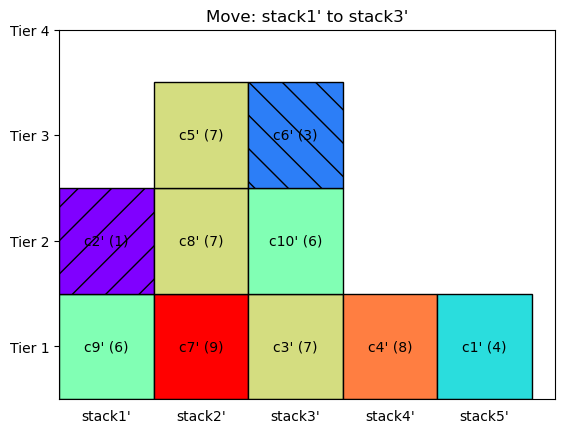

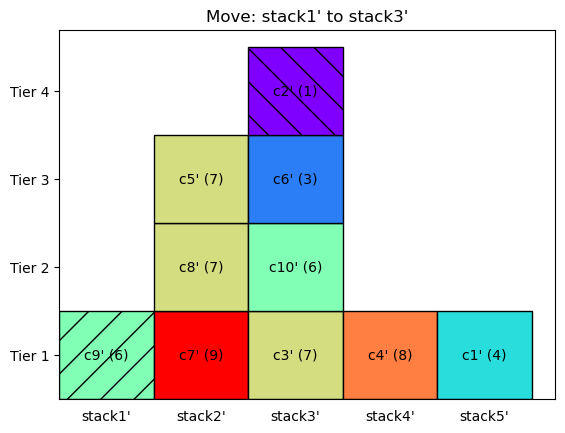

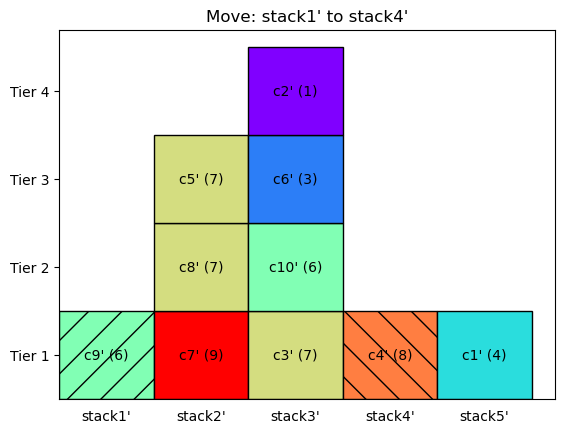

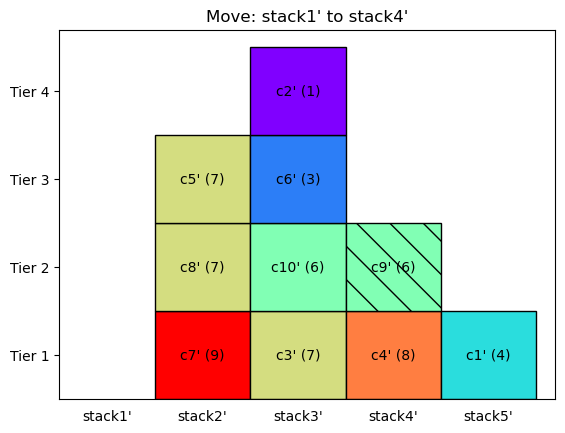

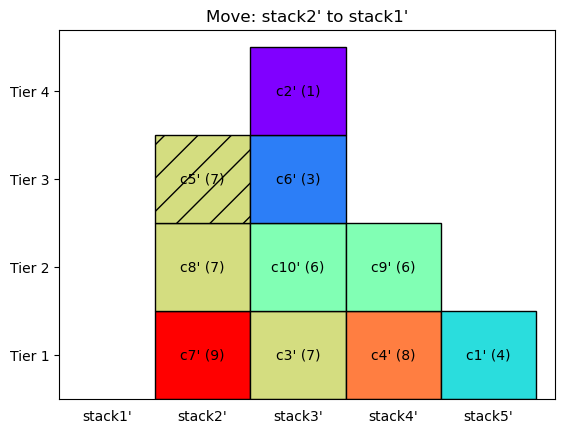

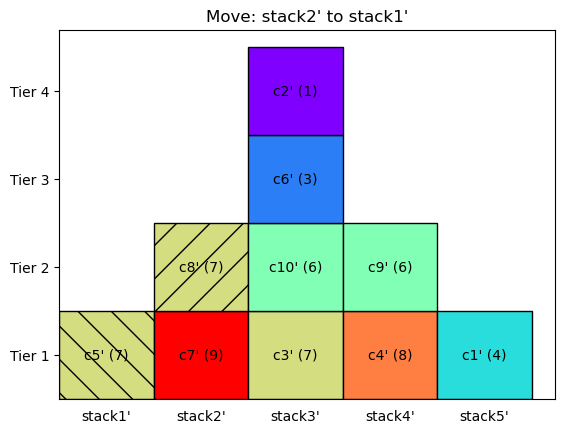

In [20]:
bay = {
     "stack1'": [],
  "stack2'": [("c2'", 1), ("c9'", 6)],
  "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
  "stack4'": [("c6'", 3)],
  "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
      }

P=[("stack2'", "stack1'"),
 ("stack3'", "stack4'"),
 ("stack2'", "stack1'"),
 ("stack3'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack4'", "stack3'"),
 ("stack4'", "stack3'"),
 ("stack5'", "stack4'"),
 ("stack1'", "stack3'"),
 ("stack1'", "stack4'"),
 ("stack2'", "stack1'")]

for move in P:
    # Visualize the bay before the move
    plot_bay(bay, move)
    
    # Create a copy of the bay
    bay_copy = copy.deepcopy(bay)

    # Perform the move in the copy
    moved_container = bay_copy[move[0]].pop()
    bay_copy[move[1]].append(moved_container)

    # Now, we visualize the copied bay after the move
    plot_bay(bay_copy, move)

    # Finally, update the original bay
    bay = bay_copy


In [22]:
def plot_bay(bay, move=None):
    fig, ax = plt.subplots()

    # Use unique color for each unique time window
    unique_times = set(container[1] for stack in bay.values() for container in stack)
    colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

    # add hatch patterns
    hatch_patterns = ['', '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

    for i, (stack_name, stack) in enumerate(bay.items()):
        bottom = 0
        for j, (container_id, container_time) in enumerate(stack):
            # get color
            color_index = list(unique_times).index(container_time)
            color = colors[color_index]
            
            hatch = None
            if move is not None:
                if stack_name == move[0] and j == len(stack) - 1: # Source stack and top container before move
                    hatch = hatch_patterns[1] # You can select different hatch patterns
                elif stack_name == move[1] and j == len(stack) - 1: # Destination stack and top container after move
                    hatch = hatch_patterns[2] # Different hatch pattern

            ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1, hatch=hatch)
            ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
            bottom += 1

    ax.set_xticks(np.arange(len(bay)))
    ax.set_xticklabels(bay.keys())
    ax.set_yticks(np.arange(4) + 0.5)
    ax.set_yticklabels([f'Tier {i+1}' for i in range(4)])

    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=True)

    ax.set_xlim(left=-0.5)

    if move is not None:
        plt.title(f'Move: {move[0]} to {move[1]}')
    else:
        plt.title('Initial Container Location')

    plt.show()




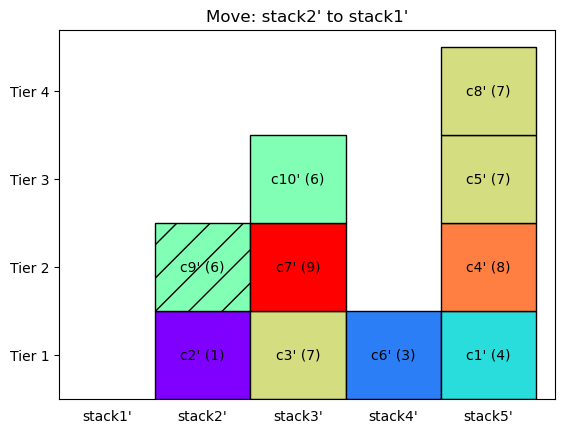

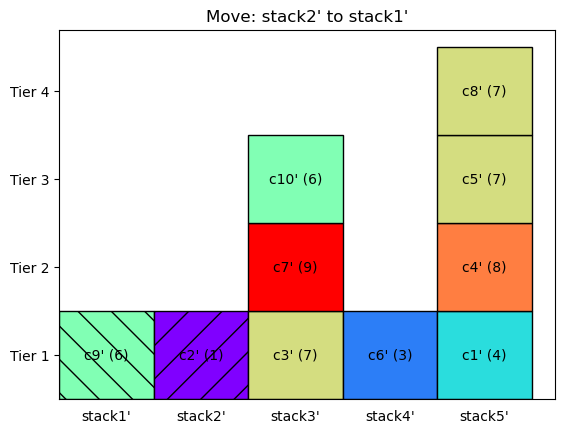

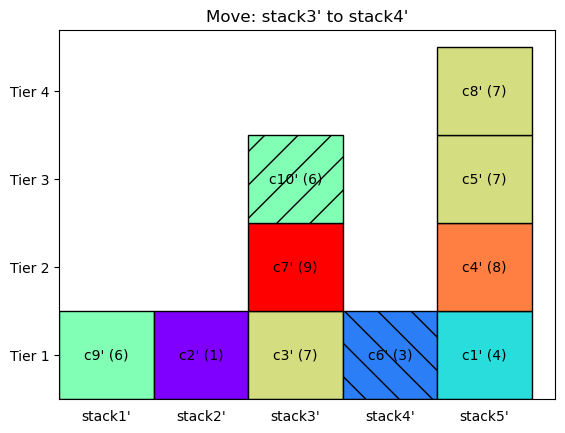

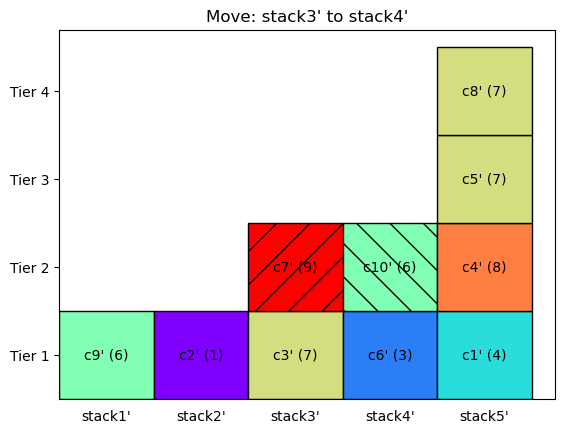

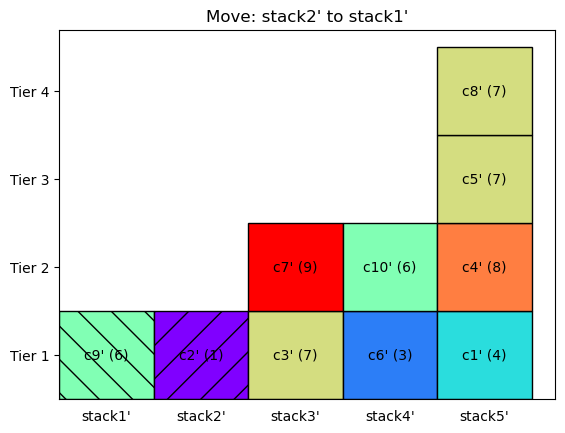

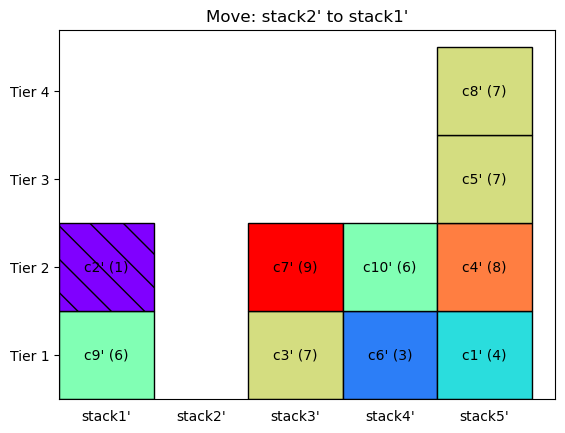

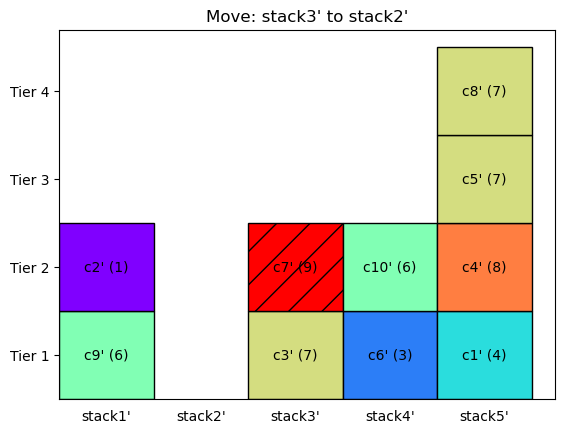

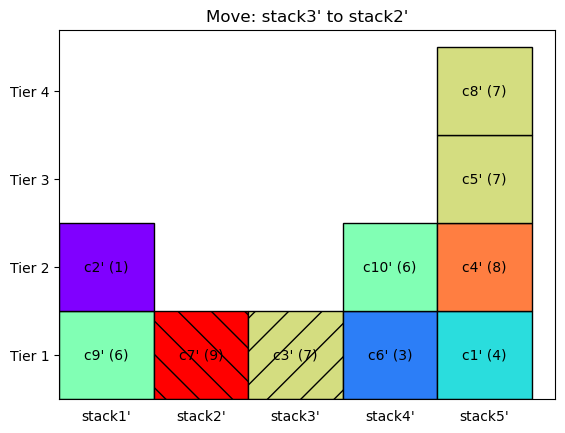

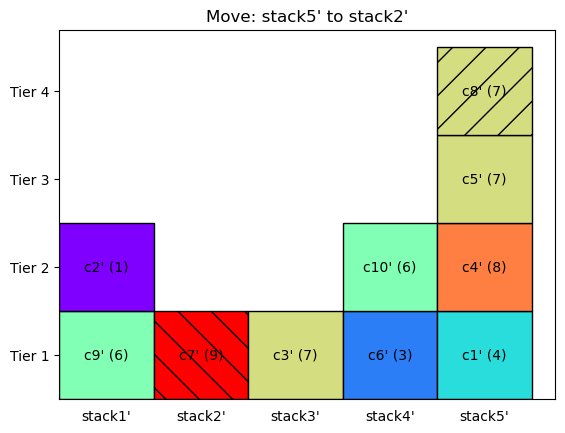

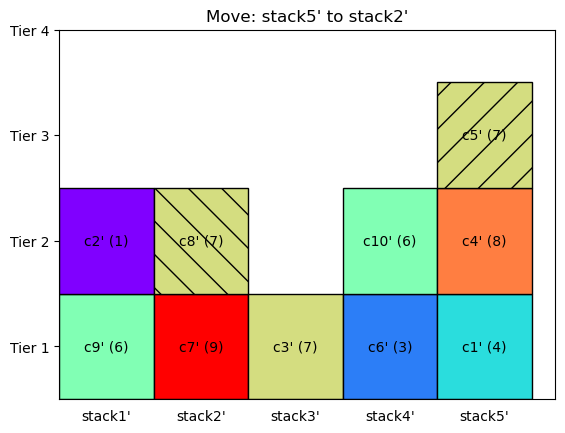

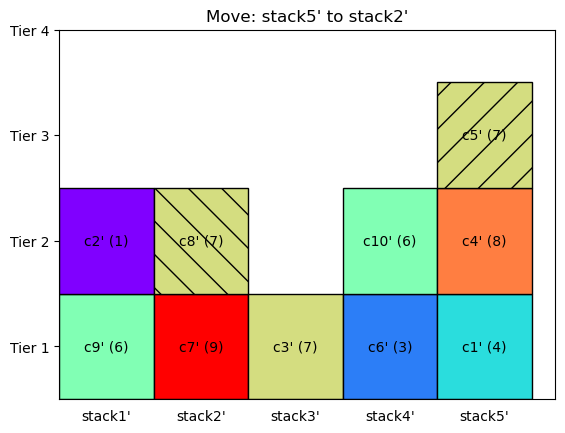

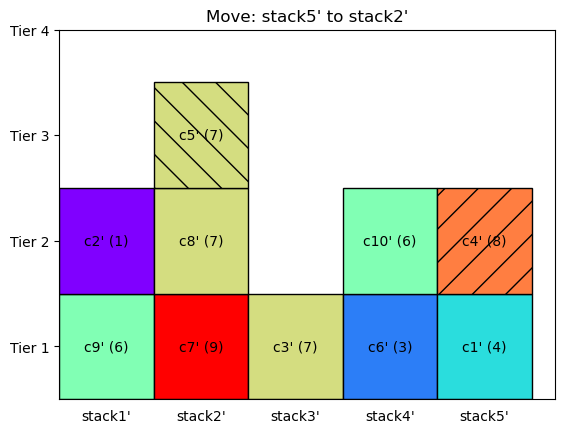

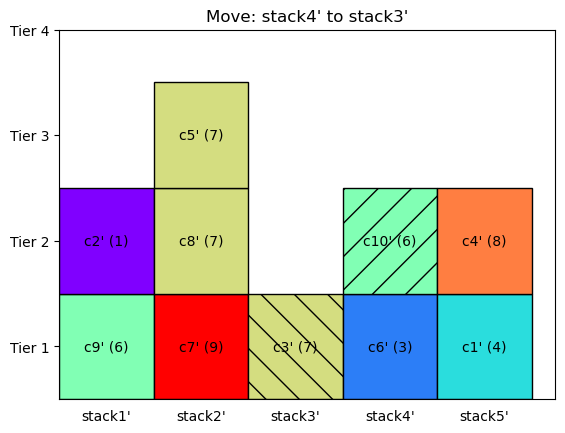

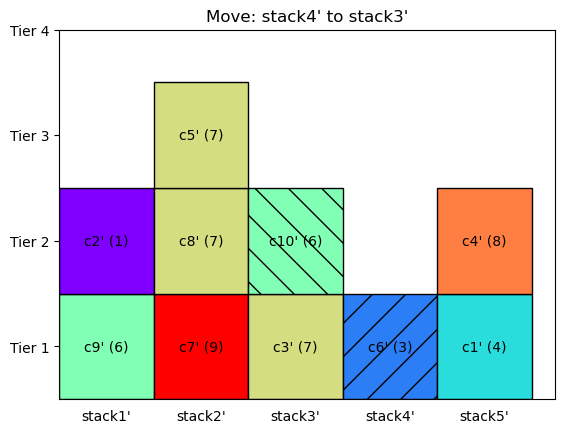

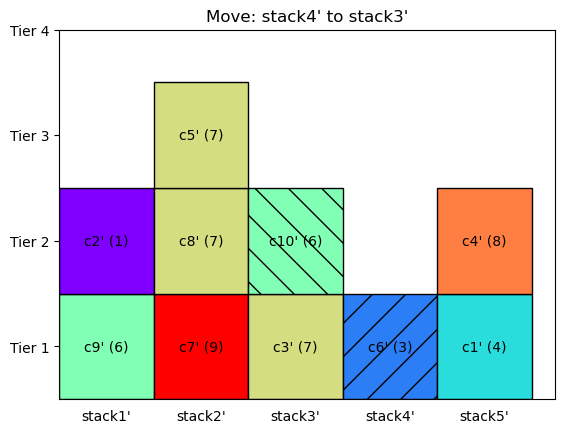

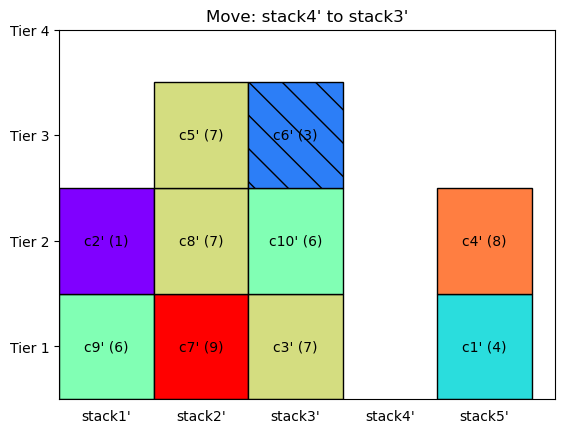

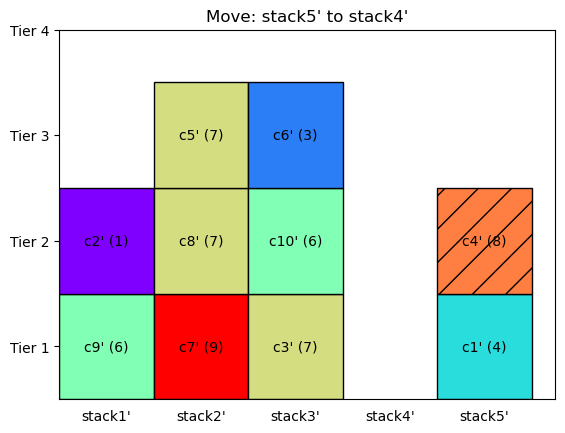

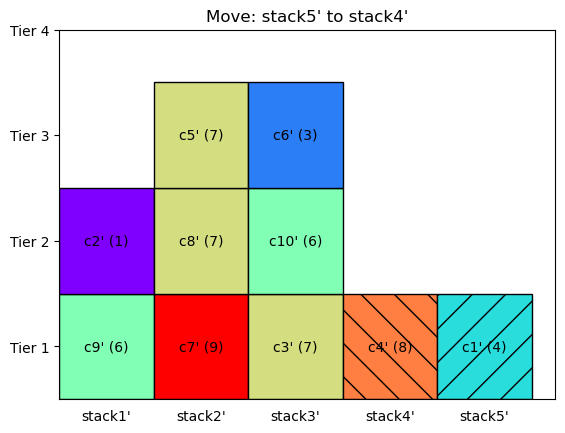

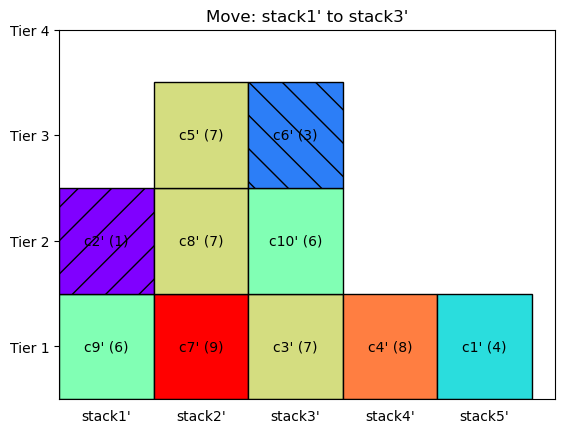

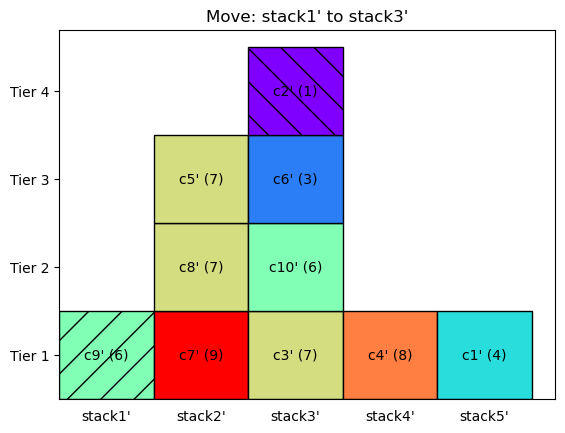

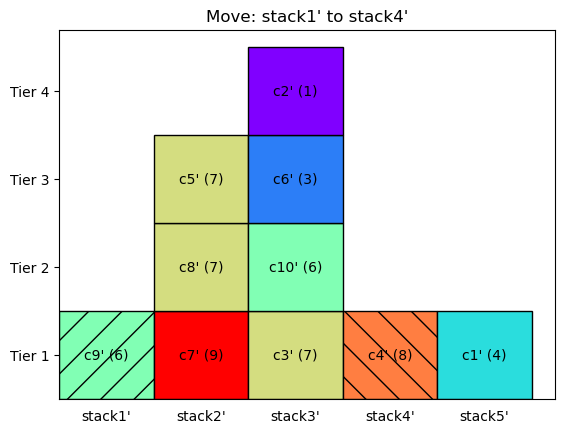

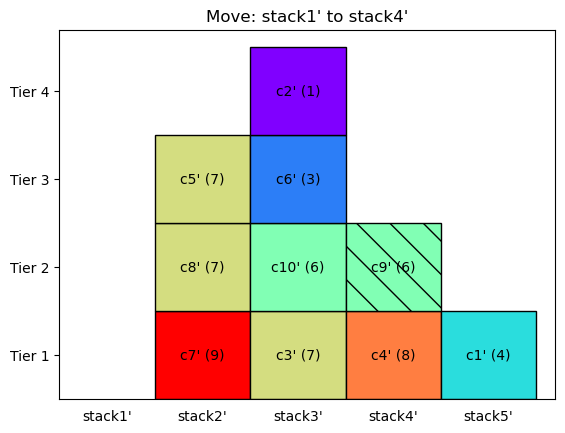

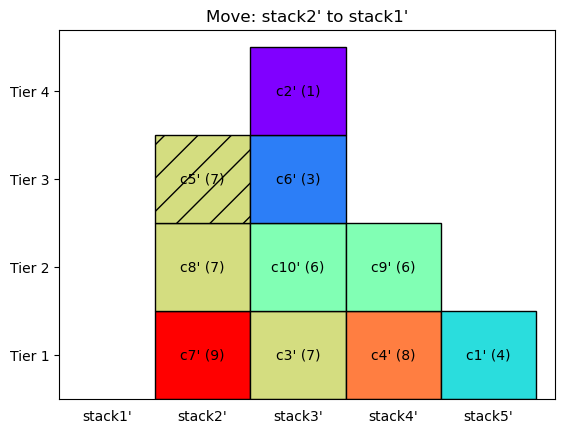

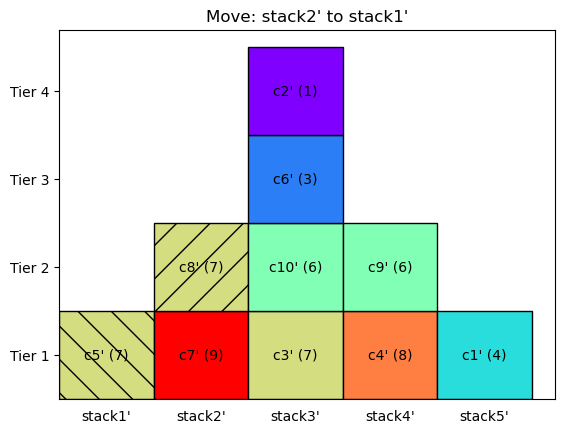

In [23]:
bay = {
     "stack1'": [],
  "stack2'": [("c2'", 1), ("c9'", 6)],
  "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
  "stack4'": [("c6'", 3)],
  "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
      }

P=[("stack2'", "stack1'"),
 ("stack3'", "stack4'"),
 ("stack2'", "stack1'"),
 ("stack3'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack4'", "stack3'"),
 ("stack4'", "stack3'"),
 ("stack5'", "stack4'"),
 ("stack1'", "stack3'"),
 ("stack1'", "stack4'"),
 ("stack2'", "stack1'")]

for move in P:
    # Visualize the bay before the move
    plot_bay(bay, move)
    
    # Create a copy of the bay
    bay_copy = copy.deepcopy(bay)

    # Perform the move in the copy
    moved_container = bay_copy[move[0]].pop()
    bay_copy[move[1]].append(moved_container)

    # Now, we visualize the copied bay after the move
    plot_bay(bay_copy, move)

    # Finally, update the original bay
    bay = bay_copy

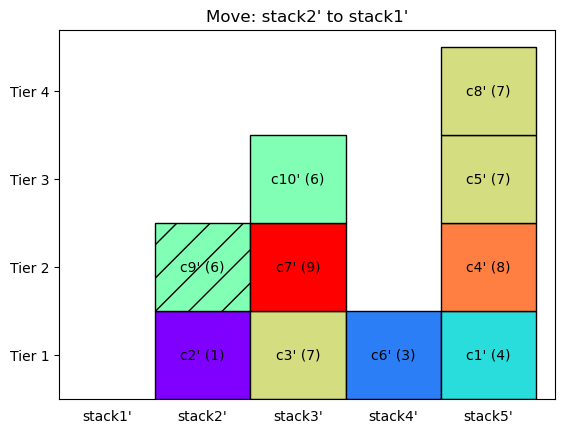

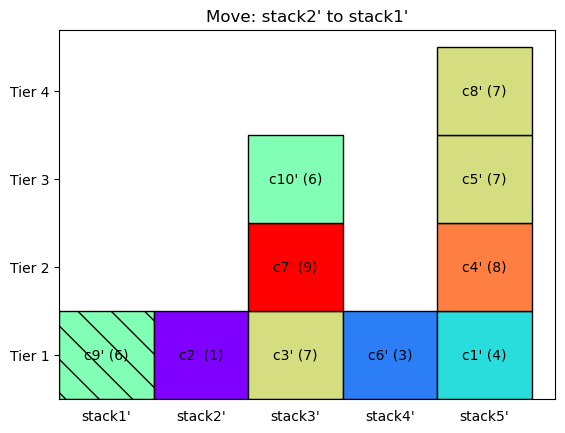

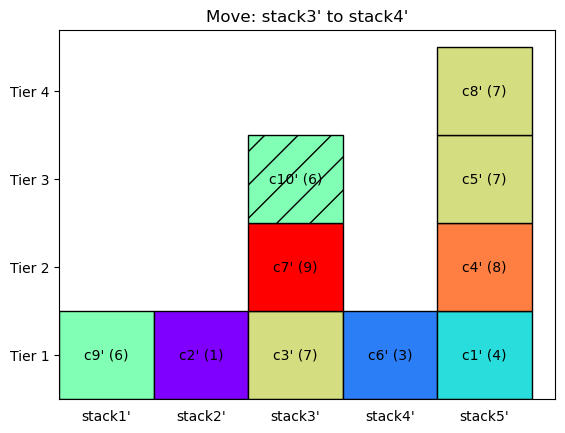

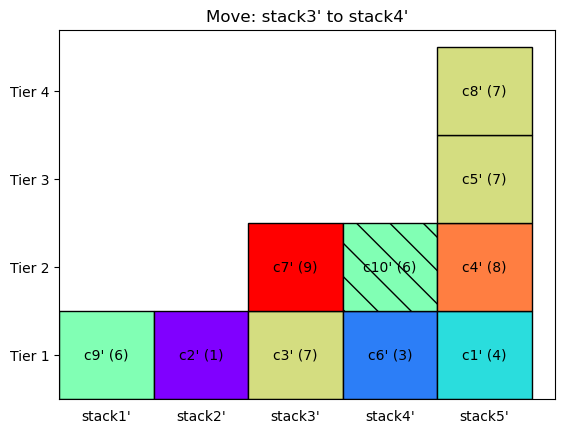

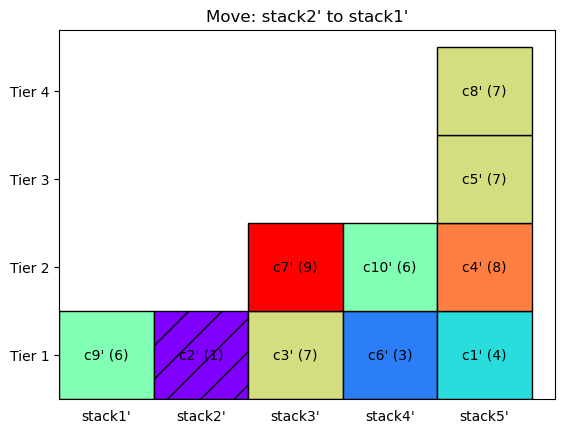

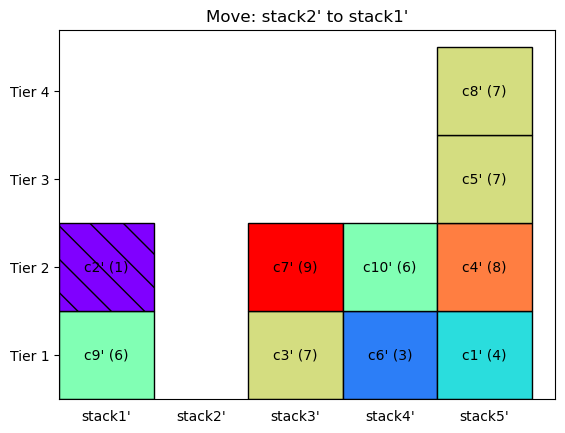

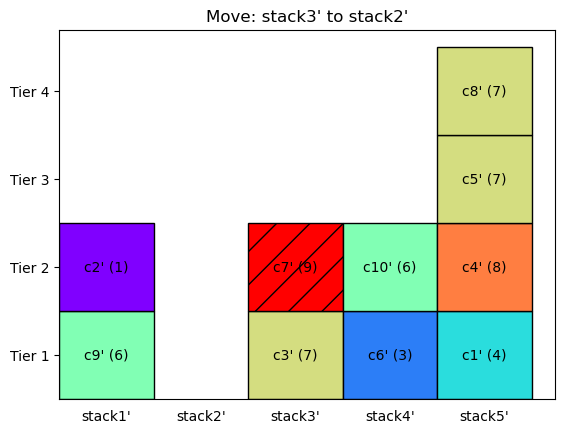

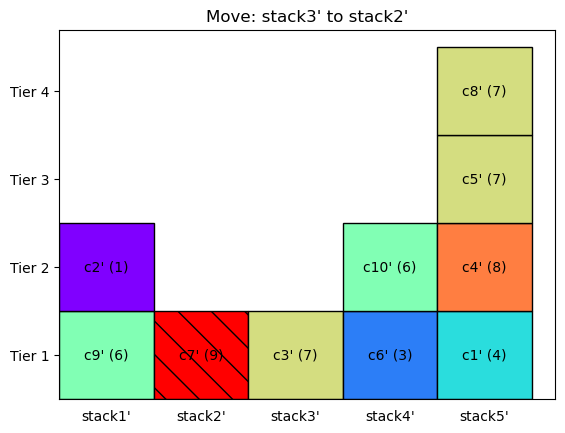

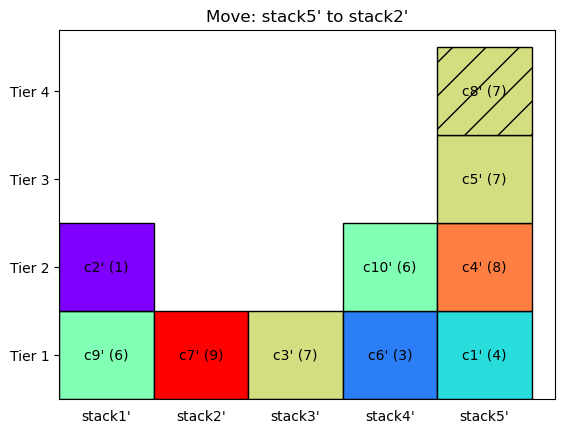

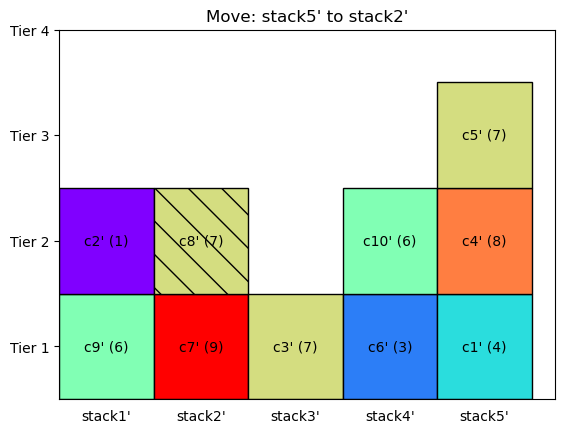

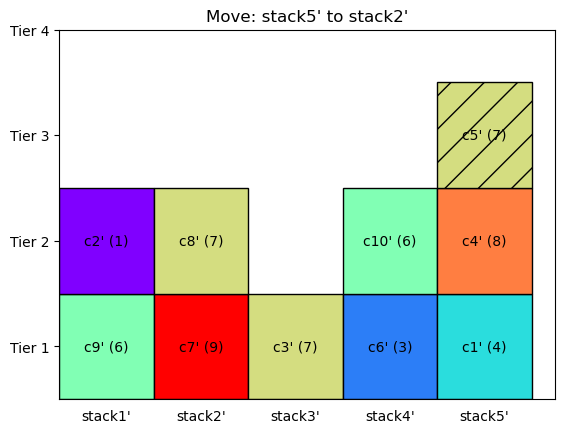

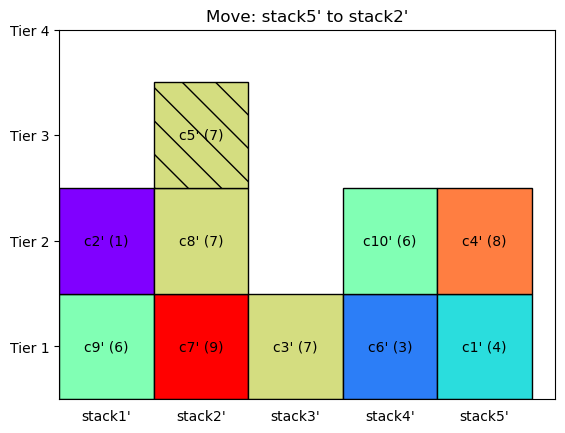

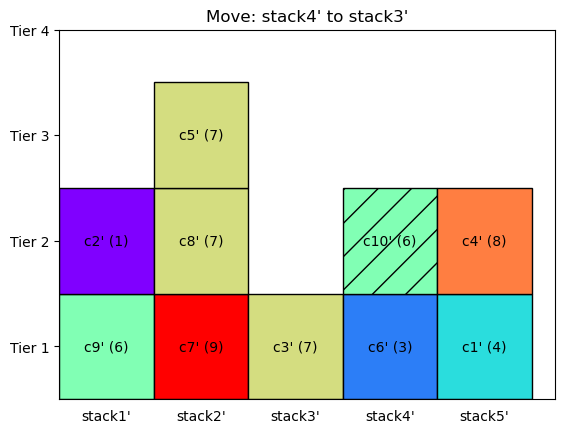

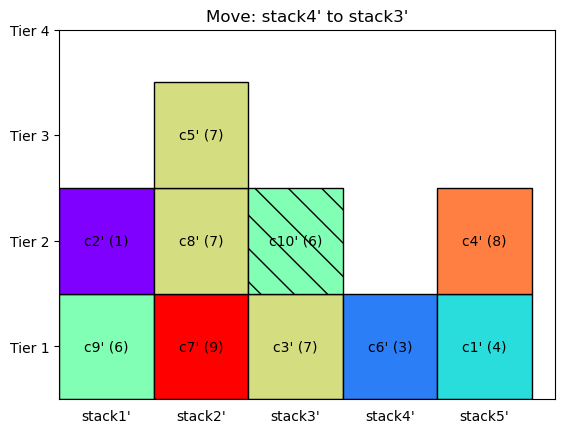

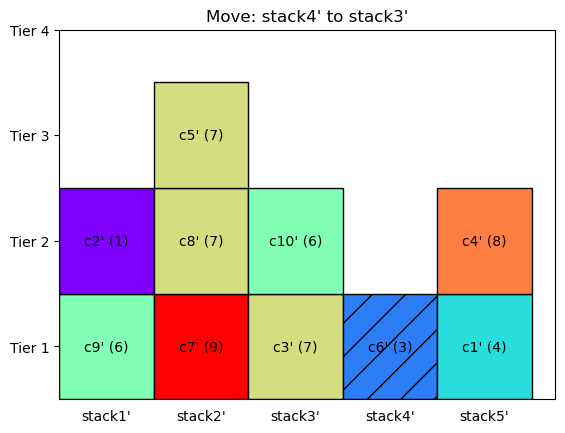

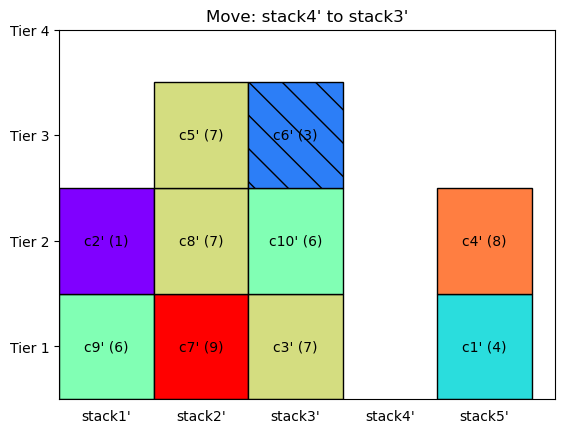

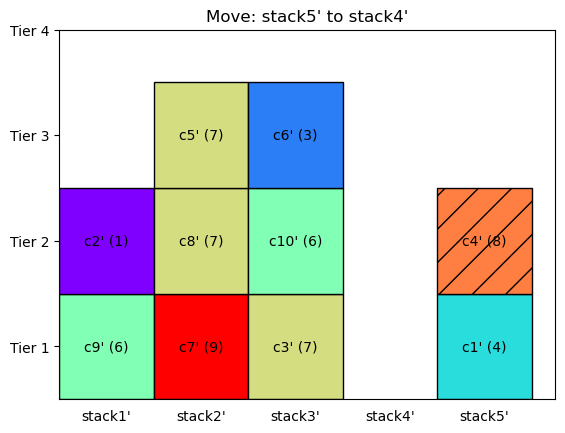

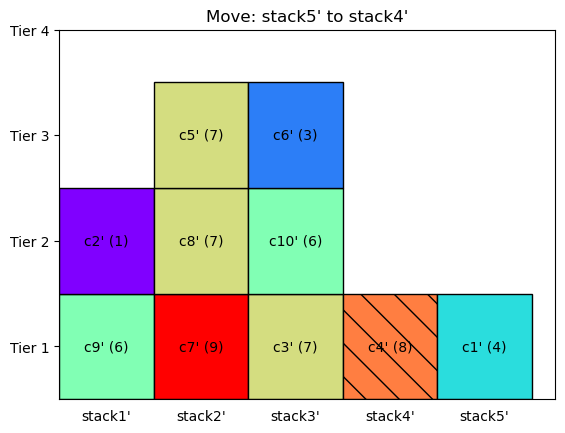

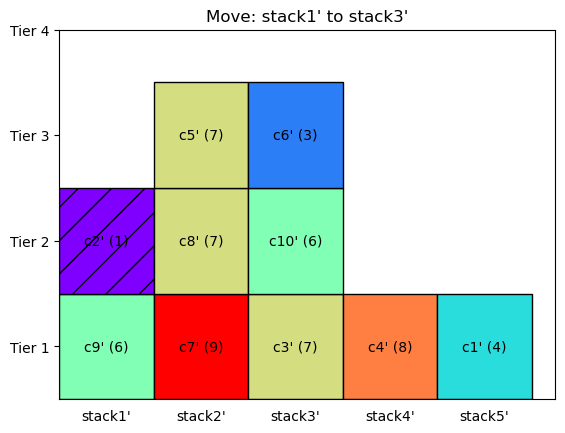

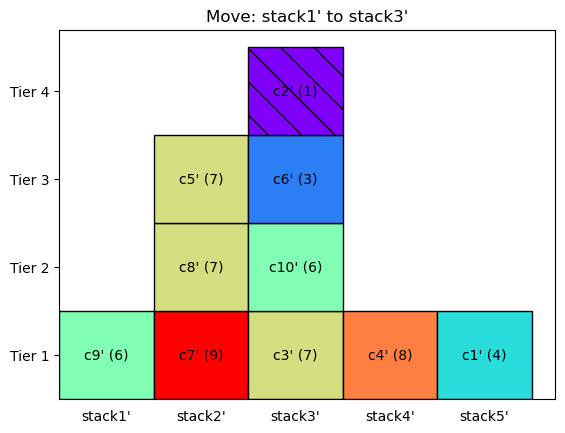

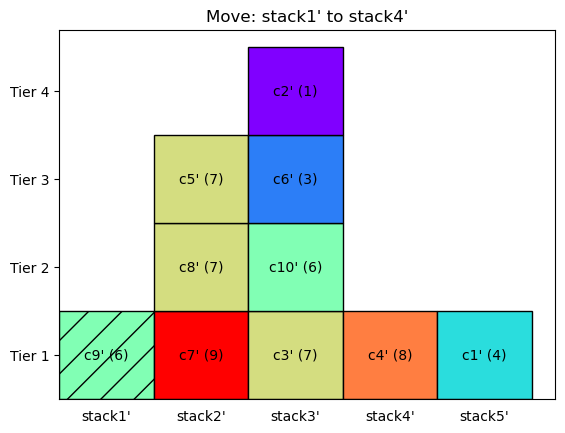

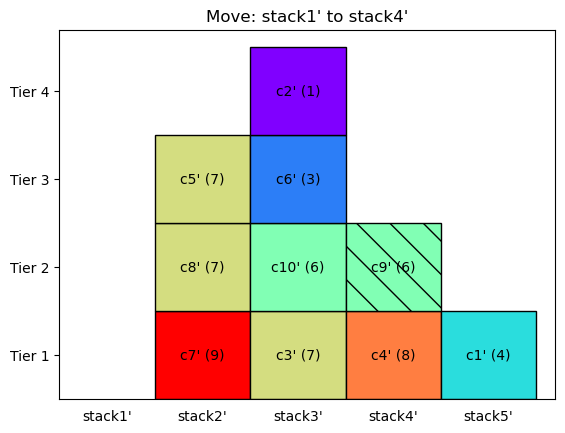

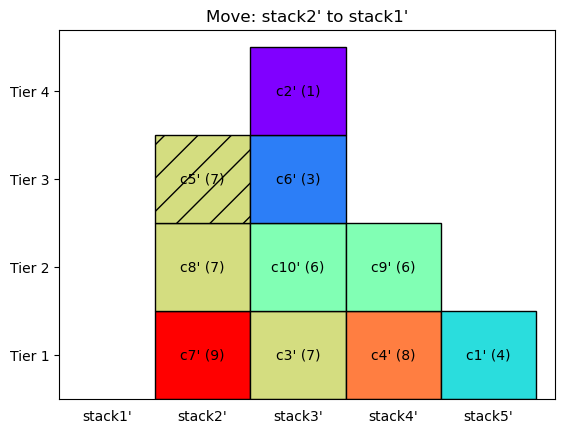

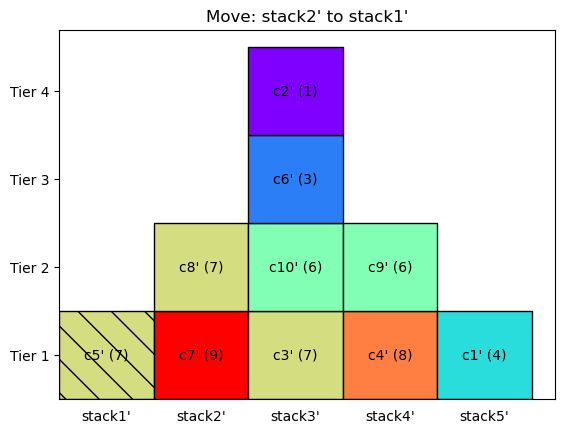

In [28]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_bay(bay, move=None, after=False):
    fig, ax = plt.subplots()

    unique_times = set(container[1] for stack in bay.values() for container in stack)
    colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

    hatch_patterns = ['', '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

    for i, (stack_name, stack) in enumerate(bay.items()):
        bottom = 0
        for j, (container_id, container_time) in enumerate(stack):
            color_index = list(unique_times).index(container_time)
            color = colors[color_index]
            
            hatch = None
            if move is not None:
                if after == False and stack_name == move[0] and j == len(stack) - 1:
                    hatch = hatch_patterns[1]
                elif after == True and stack_name == move[1] and j == len(stack) - 1:
                    hatch = hatch_patterns[2]

            ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1, hatch=hatch)
            ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
            bottom += 1

    ax.set_xticks(np.arange(len(bay)))
    ax.set_xticklabels(bay.keys())
    ax.set_yticks(np.arange(4) + 0.5)
    ax.set_yticklabels([f'Tier {i+1}' for i in range(4)])

    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=True)

    ax.set_xlim(left=-0.5)

    plt.title(f'Move: {move[0]} to {move[1]}')

    plt.show()

bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
}

P=[("stack2'", "stack1'"),
   ("stack3'", "stack4'"),
   ("stack2'", "stack1'"),
   ("stack3'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack4'", "stack3'"),
   ("stack4'", "stack3'"),
   ("stack5'", "stack4'"),
   ("stack1'", "stack3'"),
   ("stack1'", "stack4'"),
   ("stack2'", "stack1'")]

for move in P:
    # Create a copy of the bay
    bay_copy = copy.deepcopy(bay)

    # Perform the move in the copy
    moved_container = bay_copy[move[0]].pop()
    bay_copy[move[1]].append(moved_container)

    # Now, we visualize the original bay and the copied bay together
    plot_bay(bay, move, after=False)
    plot_bay(bay_copy, move, after=True)

    # Finally, update the original bay
    bay = bay_copy


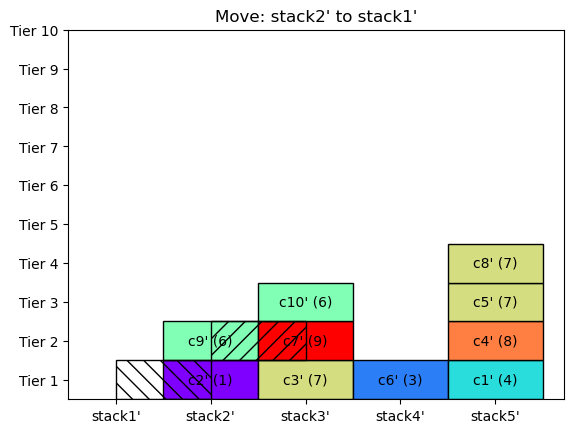

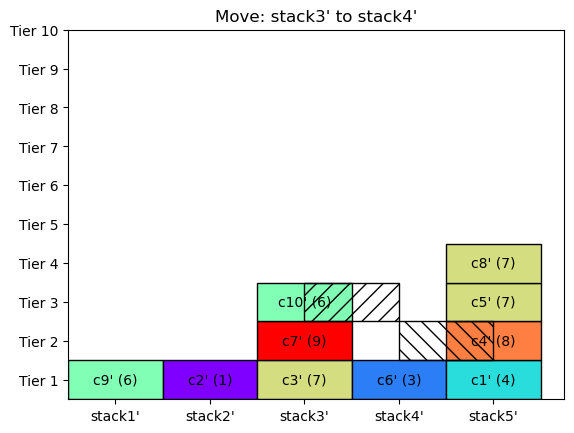

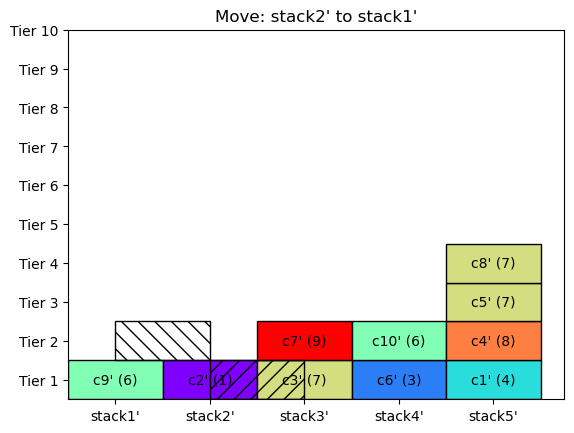

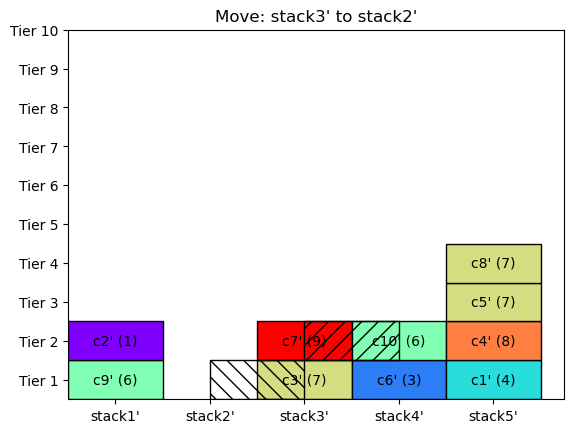

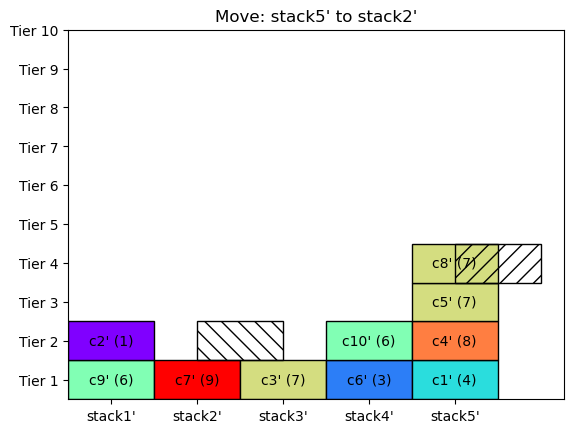

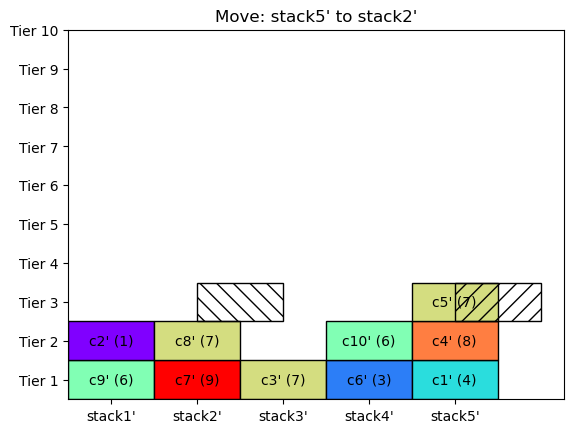

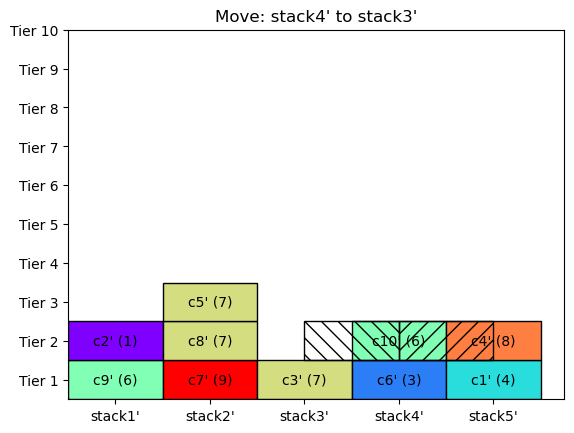

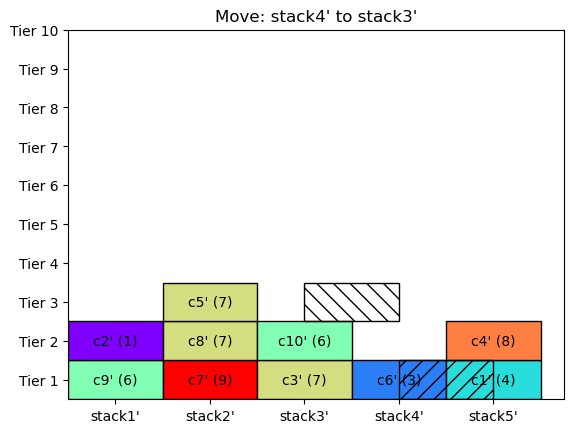

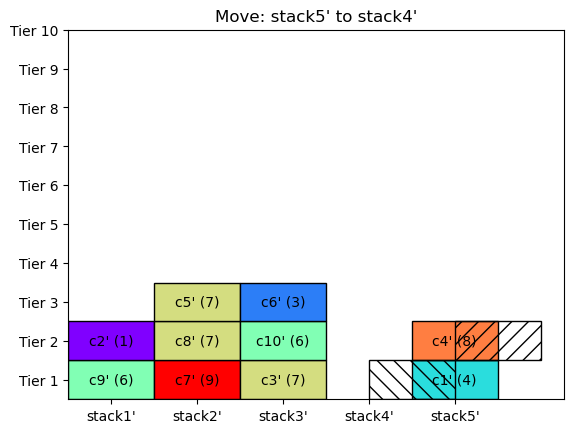

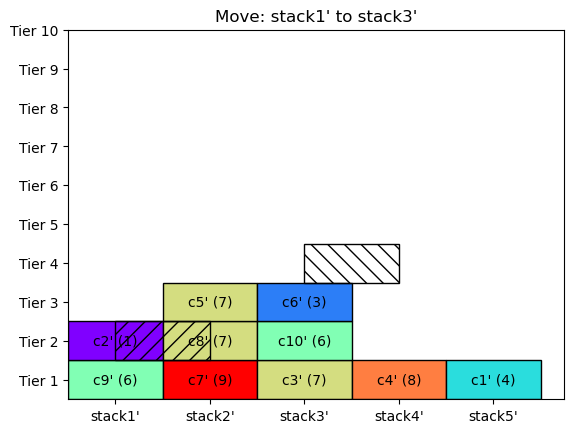

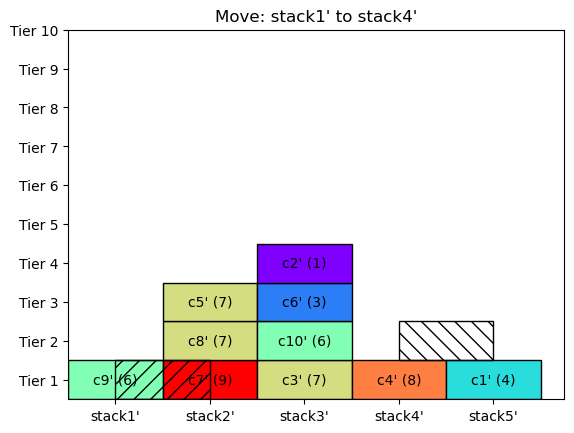

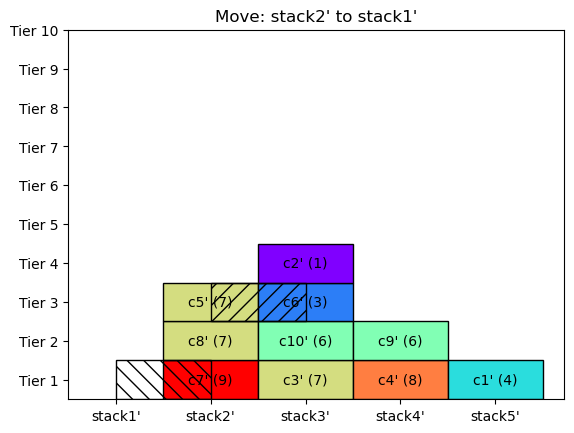

In [29]:
import matplotlib.patches as patches

def plot_bay_with_moves(bay, moves):
    for idx, move in enumerate(moves):
        fig, ax = plt.subplots()

        # Color map setup
        unique_times = set(container[1] for stack in bay.values() for container in stack)
        colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

        for i, (stack_name, stack) in enumerate(bay.items()):
            bottom = 0
            for j, (container_id, container_time) in enumerate(stack):
                # Get color
                color_index = list(unique_times).index(container_time)
                color = colors[color_index]

                ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1)
                ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
                bottom += 1

        # Move logic
        source_stack, target_stack = move
        source_container = bay[source_stack].pop()
        bay[target_stack].append(source_container)

        # Marking source container (lighter rectangle)
        ax.add_patch(patches.Rectangle((list(bay.keys()).index(source_stack), len(bay[source_stack])),
                                       1, 1, edgecolor='black', facecolor='none', hatch='//', fill=False))
        # Marking target container (darker rectangle)
        ax.add_patch(patches.Rectangle((list(bay.keys()).index(target_stack), len(bay[target_stack])-1),
                                       1, 1, edgecolor='black', facecolor='none', hatch='\\\\', fill=False))
        
        ax.set_xticks(np.arange(len(bay)))
        ax.set_xticklabels(bay.keys())
        ax.set_yticks(np.arange(10) + 0.5)
        ax.set_yticklabels([f'Tier {i+1}' for i in range(10)])
        ax.set_xlim(left=-0.5)

        plt.title(f'Move: {move[0]} to {move[1]}')
        plt.show()


bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
}

P=[("stack2'", "stack1'"),
   ("stack3'", "stack4'"),
   ("stack2'", "stack1'"),
   ("stack3'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack4'", "stack3'"),
   ("stack4'", "stack3'"),
   ("stack5'", "stack4'"),
   ("stack1'", "stack3'"),
   ("stack1'", "stack4'"),
   ("stack2'", "stack1'")]

plot_bay_with_moves(bay, P)


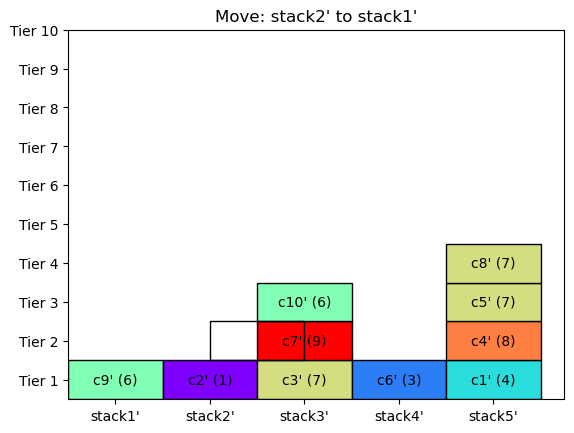

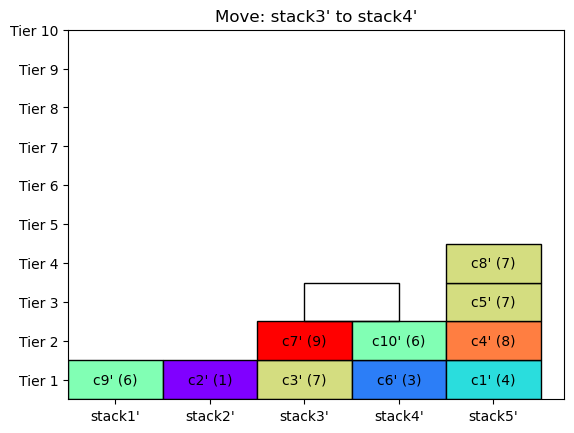

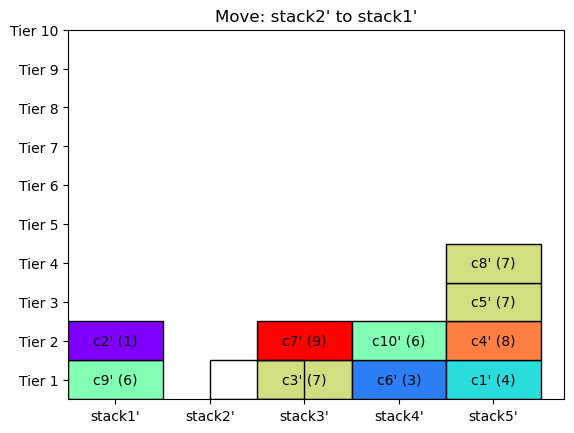

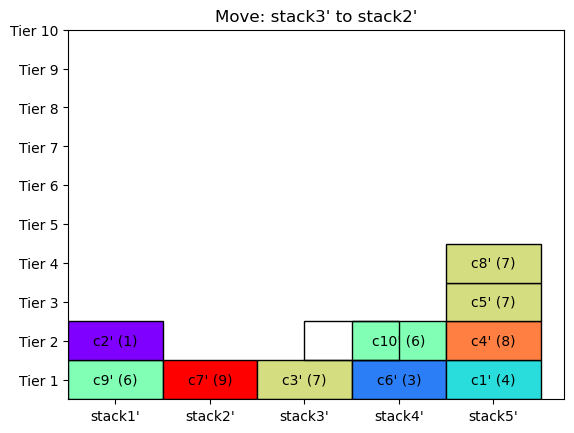

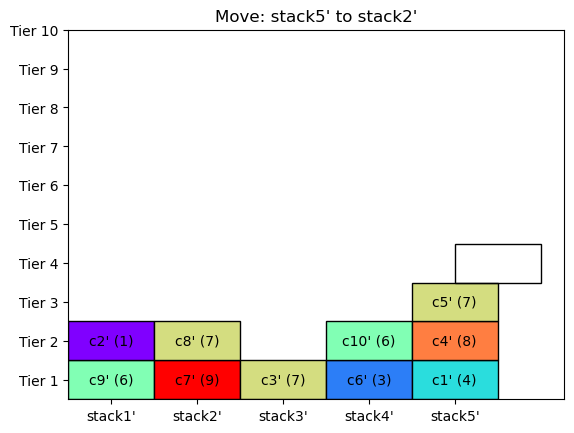

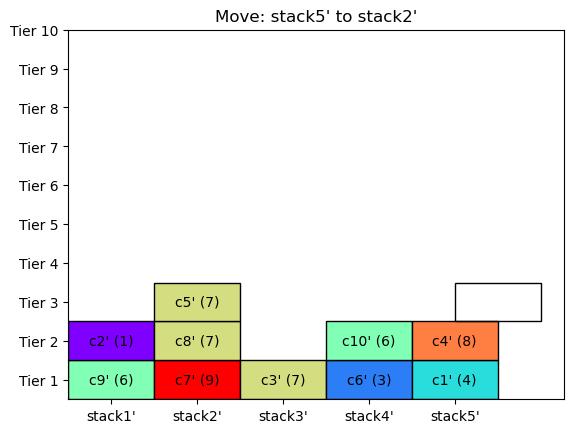

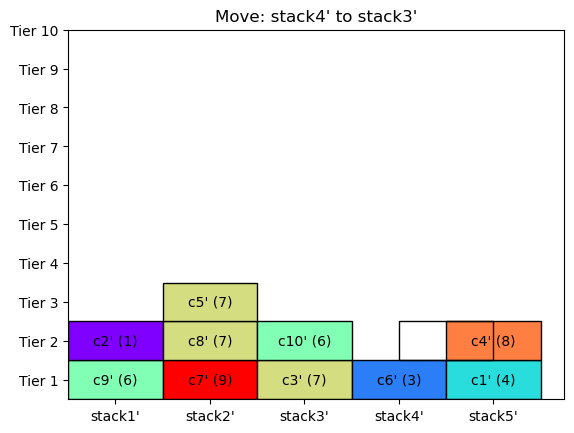

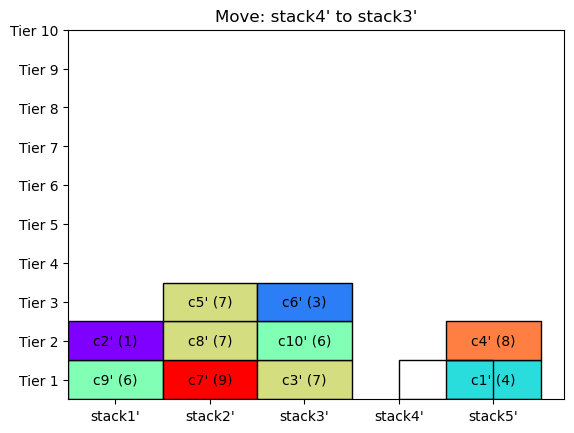

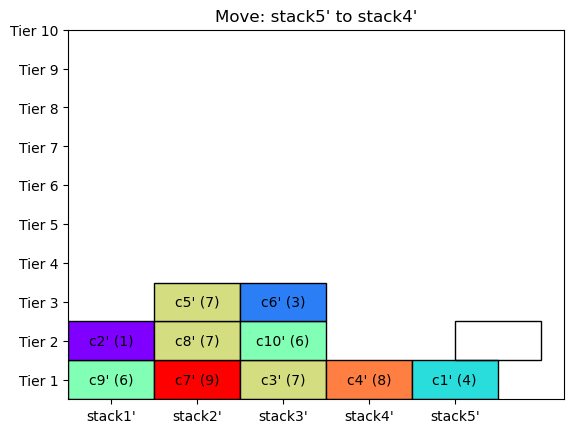

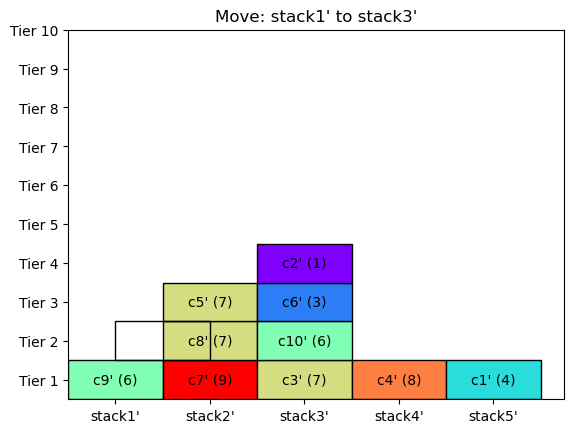

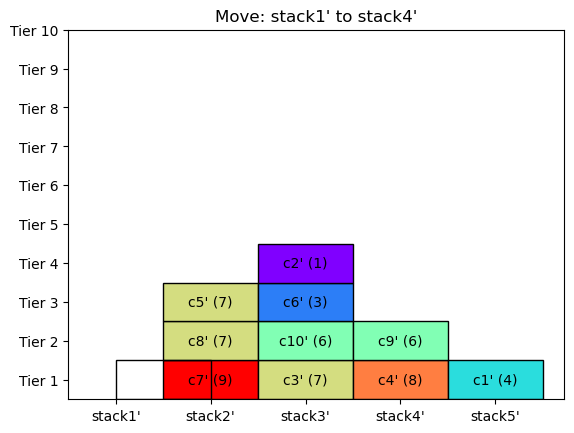

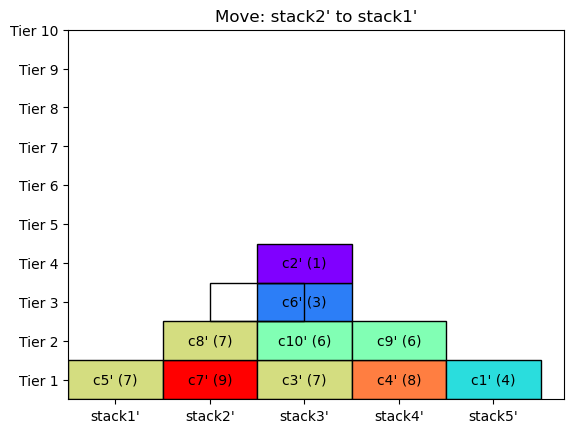

In [30]:
import matplotlib.patches as patches

def plot_bay_with_moves(bay, moves):
    for idx, move in enumerate(moves):
        # Perform the move
        source_stack, target_stack = move
        source_container = bay[source_stack].pop()
        bay[target_stack].append(source_container)
        
        # Create a plot
        fig, ax = plt.subplots()

        # Color map setup
        unique_times = set(container[1] for stack in bay.values() for container in stack)
        colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

        for i, (stack_name, stack) in enumerate(bay.items()):
            bottom = 0
            for j, (container_id, container_time) in enumerate(stack):
                # Get color
                color_index = list(unique_times).index(container_time)
                color = colors[color_index]

                ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1)
                ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
                bottom += 1

        # Marking source container (empty rectangle)
        ax.add_patch(patches.Rectangle((list(bay.keys()).index(source_stack), len(bay[source_stack])),
                                       1, 1, edgecolor='black', facecolor='none', fill=False))

        ax.set_xticks(np.arange(len(bay)))
        ax.set_xticklabels(bay.keys())
        ax.set_yticks(np.arange(10) + 0.5)
        ax.set_yticklabels([f'Tier {i+1}' for i in range(10)])
        ax.set_xlim(left=-0.5)

        plt.title(f'Move: {move[0]} to {move[1]}')
        plt.show()

bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
}

P=[("stack2'", "stack1'"),
   ("stack3'", "stack4'"),
   ("stack2'", "stack1'"),
   ("stack3'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack4'", "stack3'"),
   ("stack4'", "stack3'"),
   ("stack5'", "stack4'"),
   ("stack1'", "stack3'"),
   ("stack1'", "stack4'"),
   ("stack2'", "stack1'")]

plot_bay_with_moves(bay, P)


In [32]:
def plot_bay_with_moves(bay, moves, max_stacks=5, max_tiers=4):
    for idx, move in enumerate(moves):
        # Perform the move
        source_stack, target_stack = move
        source_container = bay[source_stack].pop()
        bay[target_stack].append(source_container)
        
        # Create a plot
        fig, ax = plt.subplots()

        # Color map setup
        unique_times = set(container[1] for stack in bay.values() for container in stack)
        colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

        for i in range(max_stacks):  # loop over max_stacks, not bay.items()
            stack_name = f'stack{i+1}\''  # generate the stack_name including the apostrophe
            stack = bay.get(stack_name, [])  # use get() method to avoid KeyError
            bottom = 0
            for j, (container_id, container_time) in enumerate(stack):
                # Get color
                color_index = list(unique_times).index(container_time)
                color = colors[color_index]

                ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1)
                ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
                bottom += 1

        # Marking source container (empty rectangle)
        # Note the change in the first argument to the patches.Rectangle() function
        ax.add_patch(patches.Rectangle((list(bay.keys()).index(source_stack) - 0.5, len(bay[source_stack])),
                                       1, 1, edgecolor='black', facecolor='none', fill=False))

        ax.set_xticks(np.arange(max_stacks))  # set xticks to max_stacks
        ax.set_xticklabels([f'stack{i+1}\'' for i in range(max_stacks)])  # set xticklabels accordingly

        ax.set_yticks(np.arange(max_tiers) + 0.5)  # set yticks to max_tiers
        ax.set_yticklabels([f'Tier {i+1}' for i in range(max_tiers)])  # set yticklabels accordingly
        ax.set_xlim(left=-0.5)
        ax.set_ylim([0, max_tiers])

        plt.title(f'Move: {move[0]} to {move[1]}')
        plt.show()


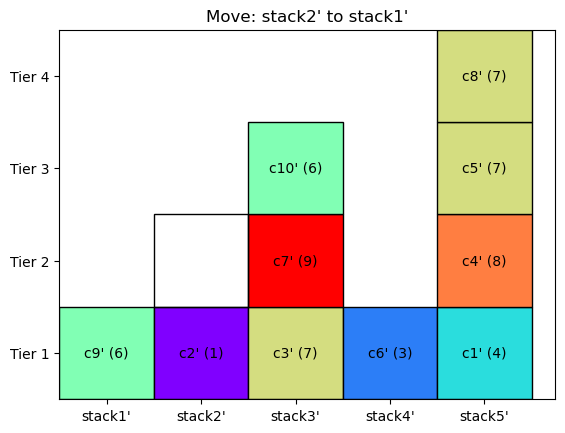

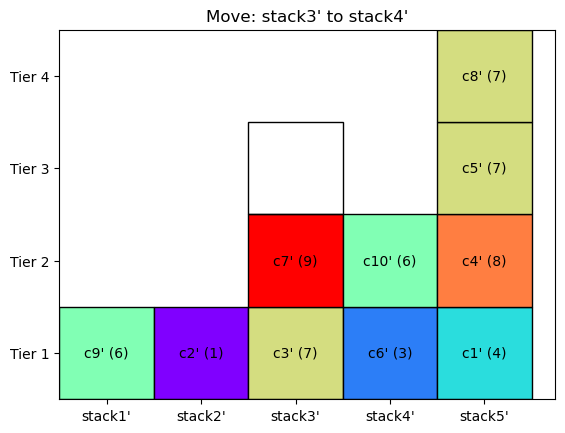

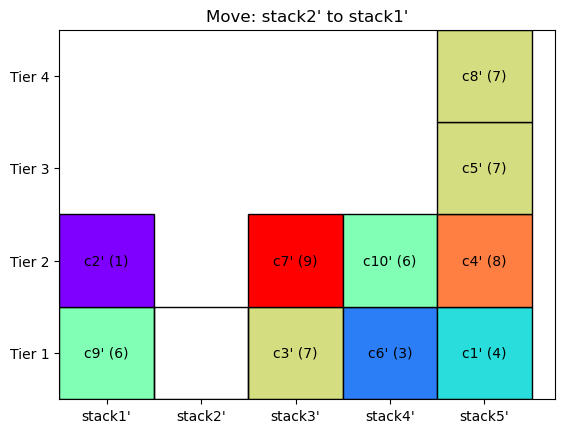

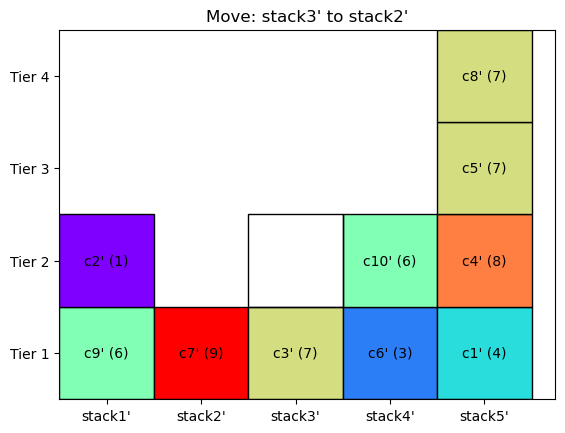

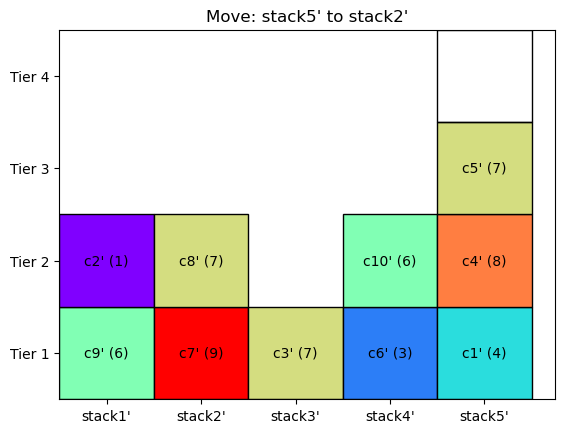

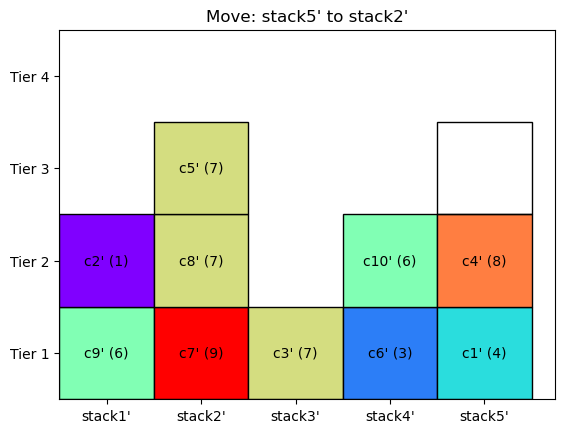

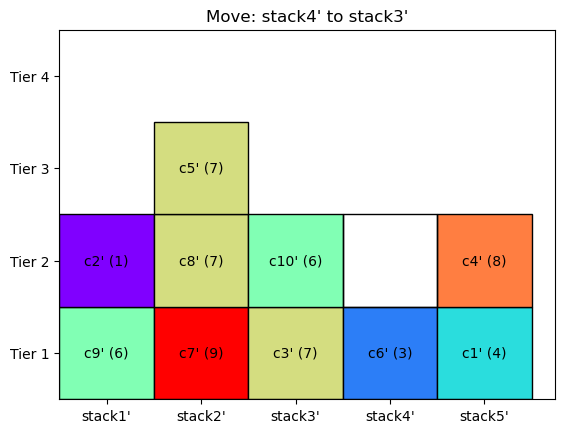

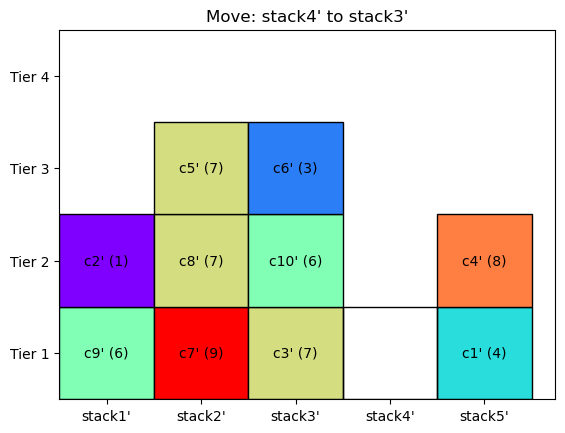

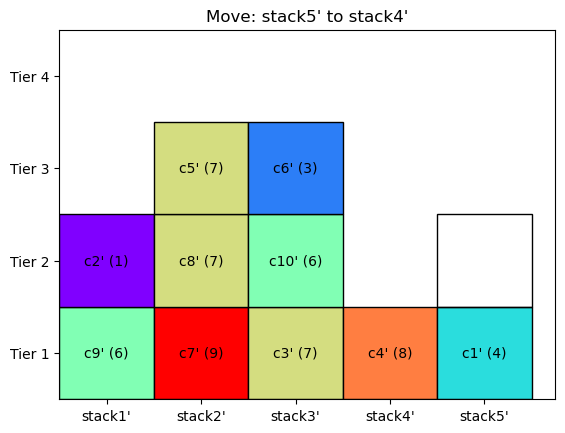

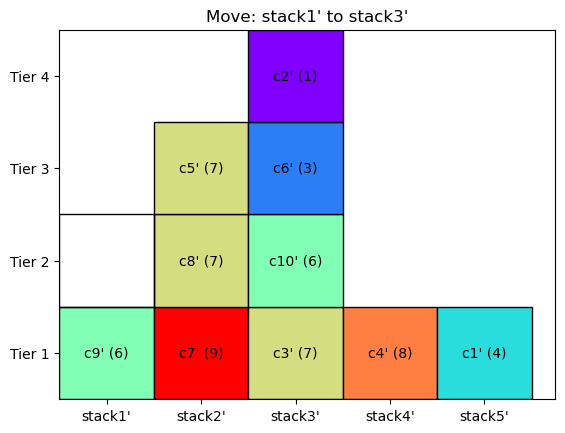

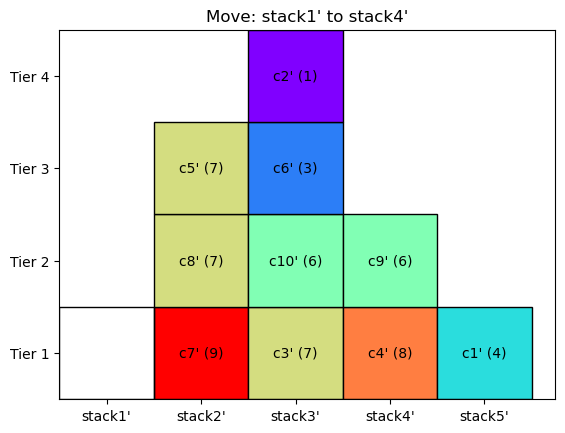

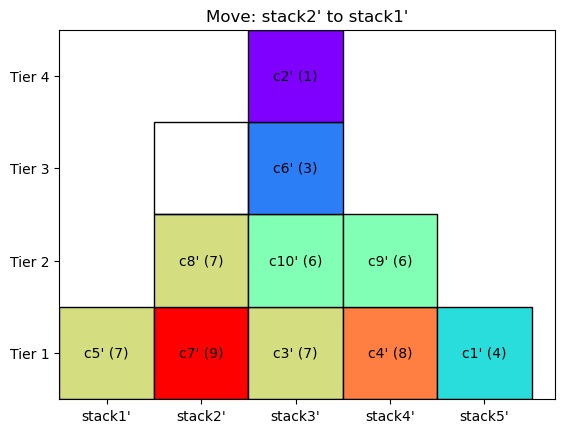

In [33]:
bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
}

P=[("stack2'", "stack1'"),
   ("stack3'", "stack4'"),
   ("stack2'", "stack1'"),
   ("stack3'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack4'", "stack3'"),
   ("stack4'", "stack3'"),
   ("stack5'", "stack4'"),
   ("stack1'", "stack3'"),
   ("stack1'", "stack4'"),
   ("stack2'", "stack1'")]

plot_bay_with_moves(bay, P, max_stacks=5, max_tiers=4)

In [34]:
def plot_bay_with_moves(bay, moves, max_stacks=5, max_tiers=4):
    for idx, move in enumerate(moves):
        # Perform the move
        source_stack, target_stack = move
        source_container = bay[source_stack].pop()
        bay[target_stack].append(source_container)
        
        # Create a plot
        fig, ax = plt.subplots()

        # Color map setup
        unique_times = set(container[1] for stack in bay.values() for container in stack)
        colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

        for i in range(max_stacks):  # loop over max_stacks, not bay.items()
            stack_name = f'stack{i+1}\''  # generate the stack_name including the apostrophe
            stack = bay.get(stack_name, [])  # use get() method to avoid KeyError
            bottom = 0
            for j, (container_id, container_time) in enumerate(stack):
                # Get color
                color_index = list(unique_times).index(container_time)
                color = colors[color_index]

                ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1)
                ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
                bottom += 1

        # Marking source container (empty rectangle)
        rect = patches.Rectangle((list(bay.keys()).index(source_stack) - 0.5, len(bay[source_stack])), 1, 1,
                                 edgecolor='red', facecolor='red', fill=True, alpha=0.5, hatch='x')
        ax.add_patch(rect)
        ax.text(list(bay.keys()).index(source_stack), len(bay[source_stack]) + 0.5,
                f"{source_container[0]} ({source_container[1]})", color='black', ha='center', va='center')

        ax.set_xticks(np.arange(max_stacks))  # set xticks to max_stacks
        ax.set_xticklabels([f'stack{i+1}\'' for i in range(max_stacks)])  # set xticklabels accordingly

        ax.set_yticks(np.arange(max_tiers) + 0.5)  # set yticks to max_tiers
        ax.set_yticklabels([f'Tier {i+1}' for i in range(max_tiers)])  # set yticklabels accordingly
        ax.set_xlim(left=-0.5)
        ax.set_ylim([0, max_tiers])

        plt.title(f'Move: {move[0]} to {move[1]}')
        plt.show()


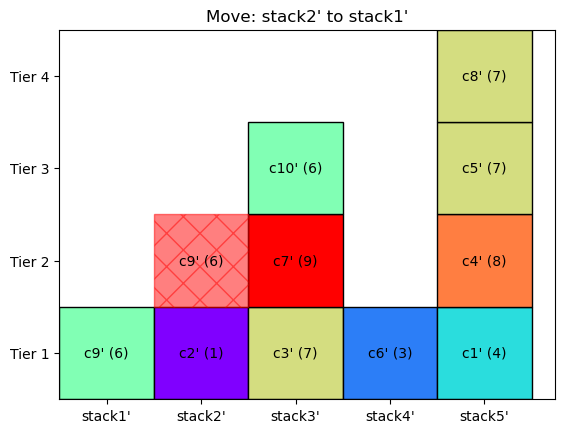

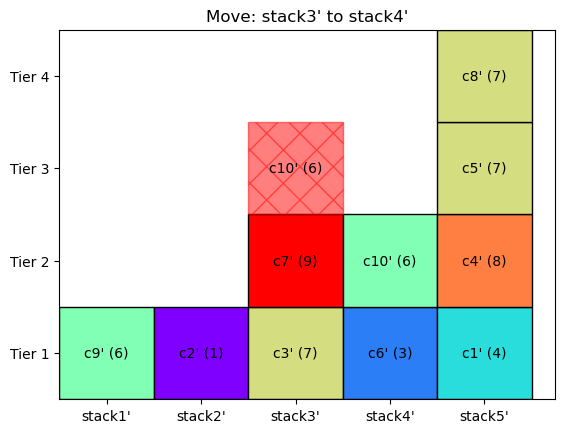

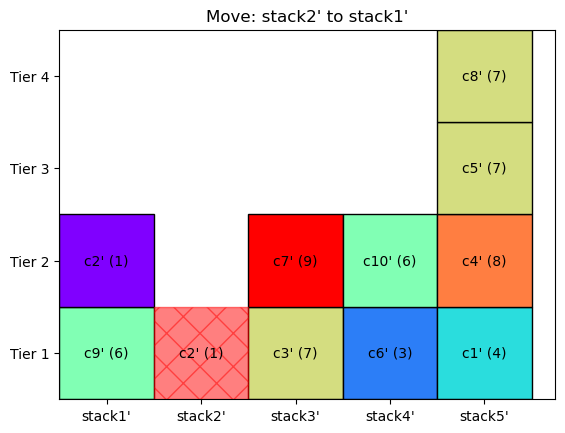

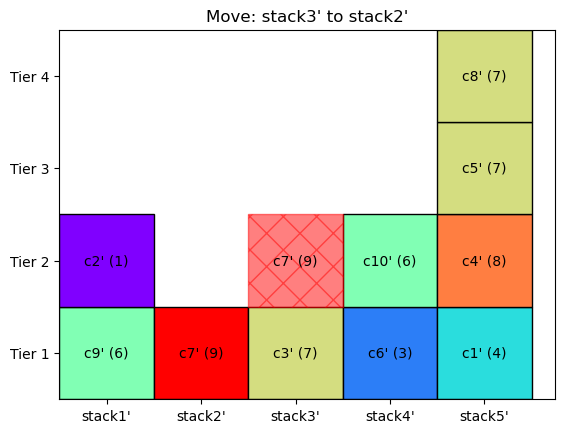

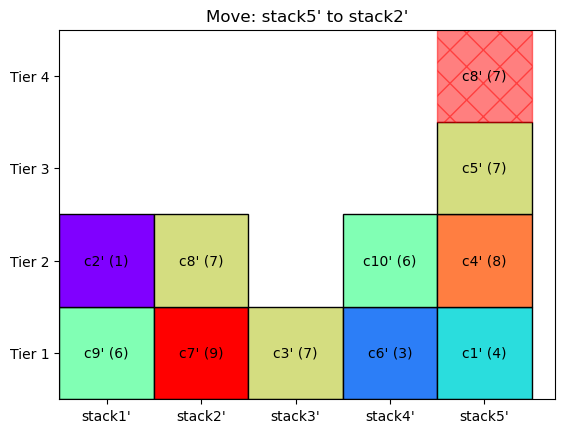

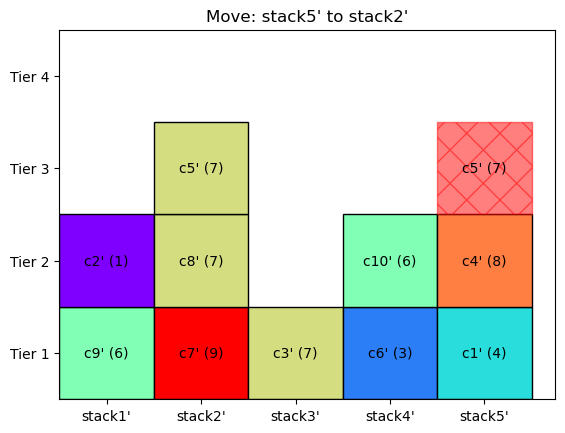

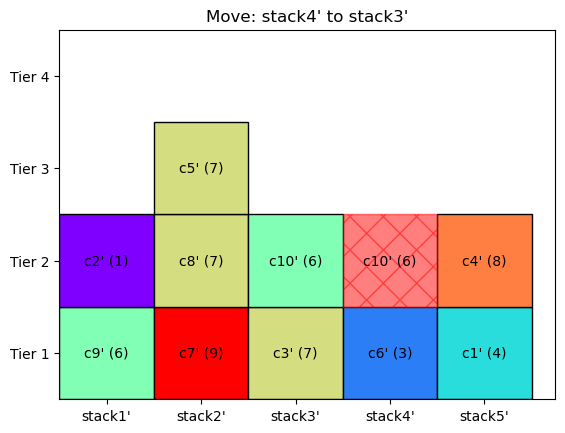

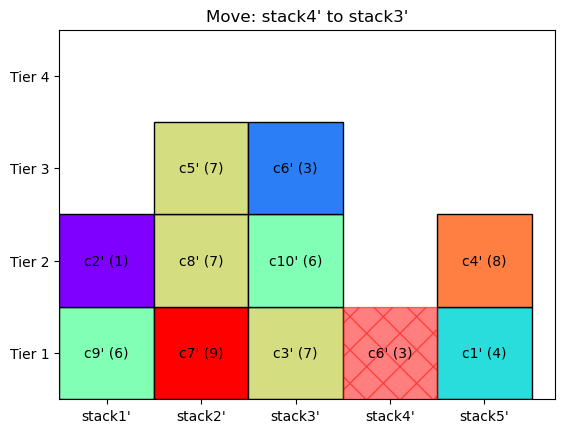

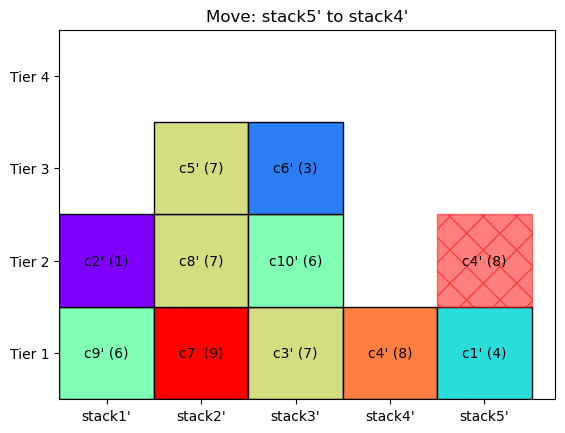

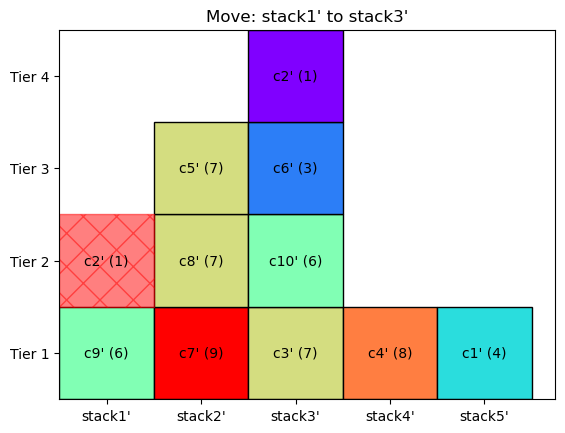

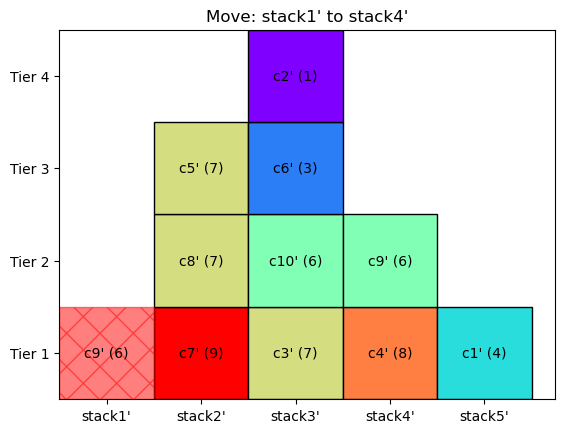

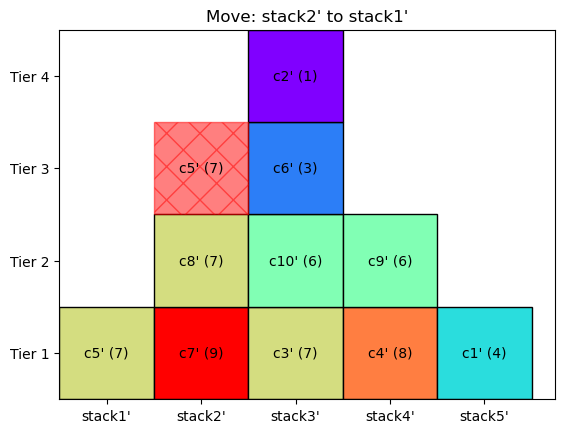

In [35]:
bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
}

P=[("stack2'", "stack1'"),
   ("stack3'", "stack4'"),
   ("stack2'", "stack1'"),
   ("stack3'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack5'", "stack2'"),
   ("stack4'", "stack3'"),
   ("stack4'", "stack3'"),
   ("stack5'", "stack4'"),
   ("stack1'", "stack3'"),
   ("stack1'", "stack4'"),
   ("stack2'", "stack1'")]

plot_bay_with_moves(bay, P, max_stacks=5, max_tiers=4)

In [36]:
def plot_bay_with_moves(bay, moves, max_stacks=5, max_tiers=4):
    for idx, move in enumerate(moves):
        # Perform the move
        source_stack, target_stack = move
        source_container = bay[source_stack].pop()
        bay[target_stack].append(source_container)
        
        # Create a plot
        fig, ax = plt.subplots()

        # Color map setup
        unique_times = set(container[1] for stack in bay.values() for container in stack)
        colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

        for i in range(max_stacks):  # loop over max_stacks, not bay.items()
            stack_name = f'stack{i+1}\''  # generate the stack_name including the apostrophe
            stack = bay.get(stack_name, [])  # use get() method to avoid KeyError
            bottom = 0
            for j, (container_id, container_time) in enumerate(stack):
                # Get color
                color_index = list(unique_times).index(container_time)
                color = colors[color_index]
                
                # Add hatch to the moved container
                hatch = 'x' if stack_name == target_stack and (container_id, container_time) == source_container else None

                ax.bar(i, 1, bottom=bottom, color=color, edgecolor='black', width=1, hatch=hatch)
                ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
                bottom += 1

        # Marking source container (empty rectangle)
        rect = patches.Rectangle((list(bay.keys()).index(source_stack) - 0.5, len(bay[source_stack])), 1, 1,
                                 edgecolor='red', facecolor='red', fill=True, alpha=0.5, hatch='x')
        ax.add_patch(rect)
        ax.text(list(bay.keys()).index(source_stack), len(bay[source_stack]) + 0.5,
                f"{source_container[0]} ({source_container[1]})", color='black', ha='center', va='center')

        ax.set_xticks(np.arange(max_stacks))  # set xticks to max_stacks
        ax.set_xticklabels([f'stack{i+1}\'' for i in range(max_stacks)])  # set xticklabels accordingly

        ax.set_yticks(np.arange(max_tiers) + 0.5)  # set yticks to max_tiers
        ax.set_yticklabels([f'Tier {i+1}' for i in range(max_tiers)])  # set yticklabels accordingly
        ax.set_xlim(left=-0.5)
        ax.set_ylim([0, max_tiers])

        plt.title(f'Move: {move[0]} to {move[1]}')
        plt.show()


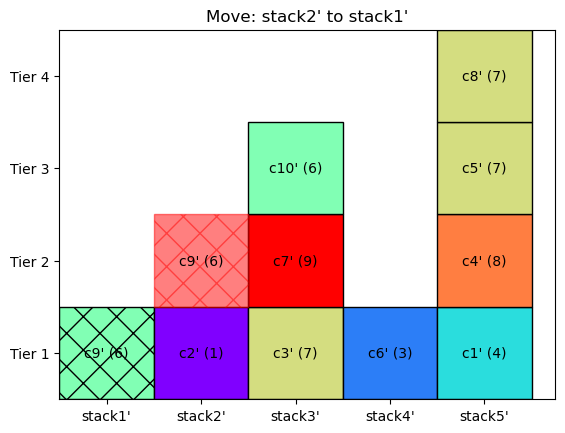

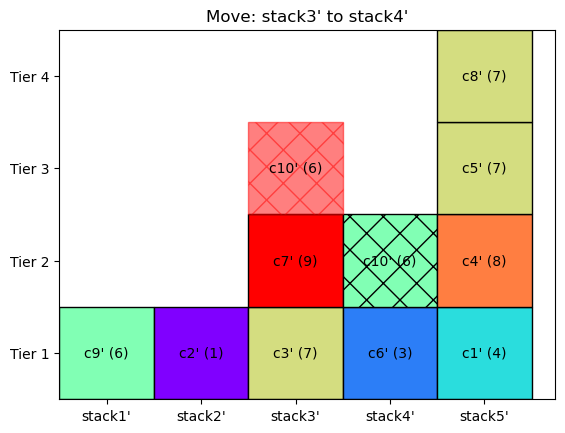

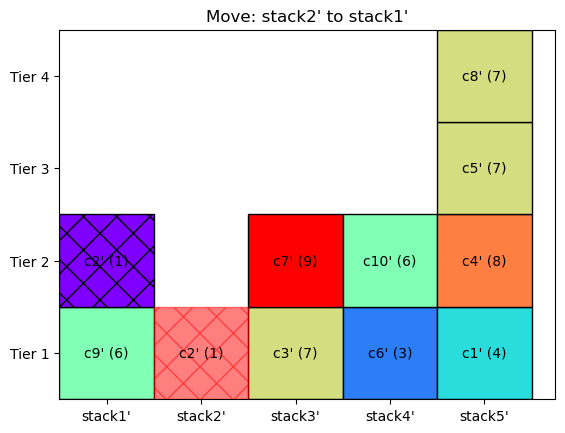

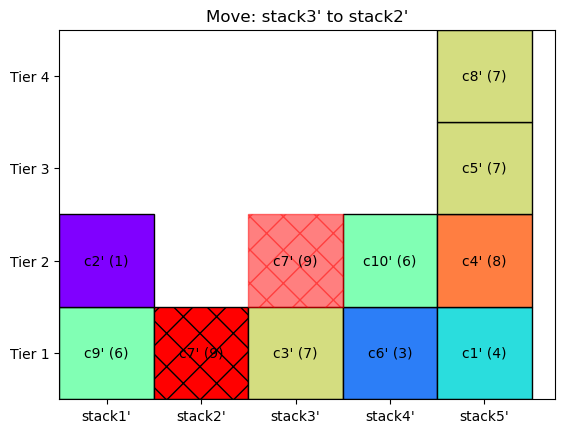

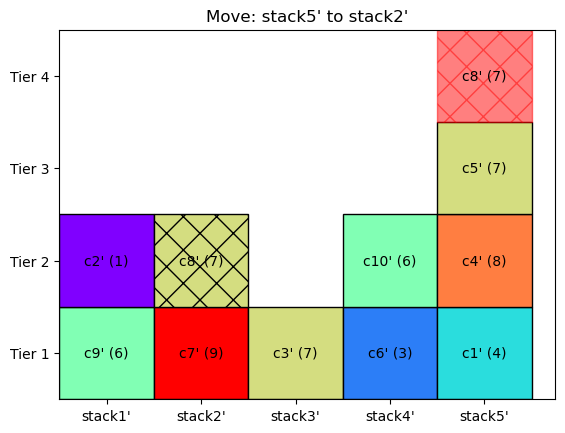

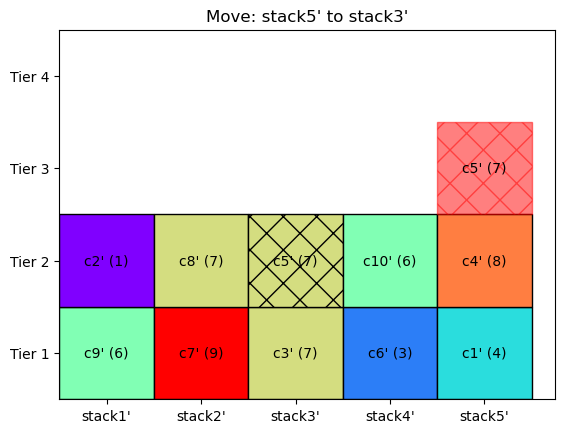

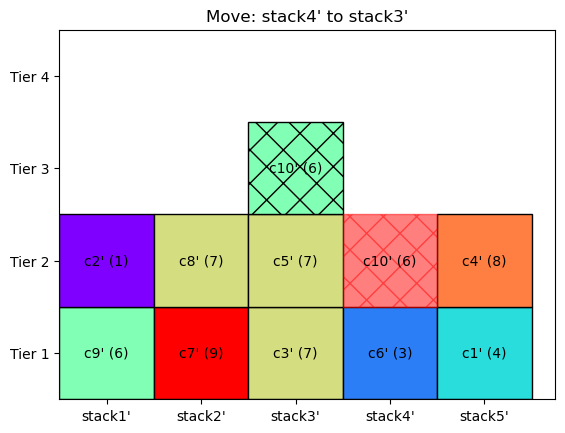

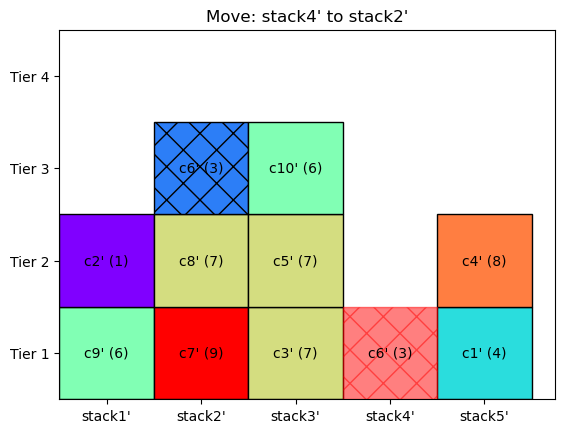

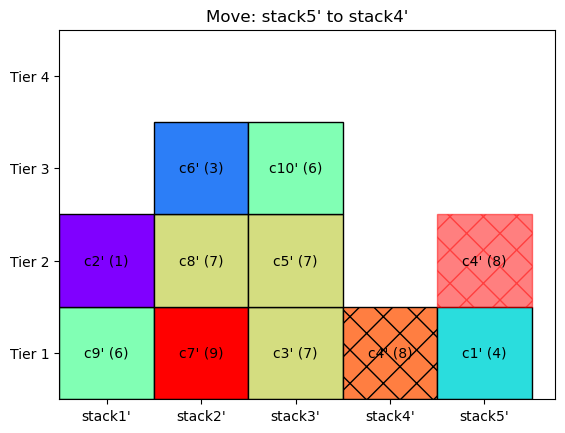

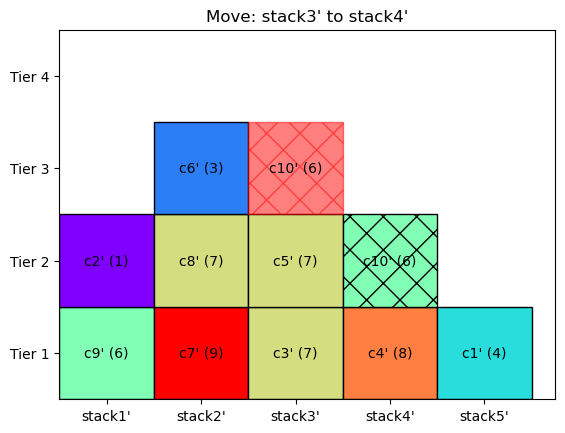

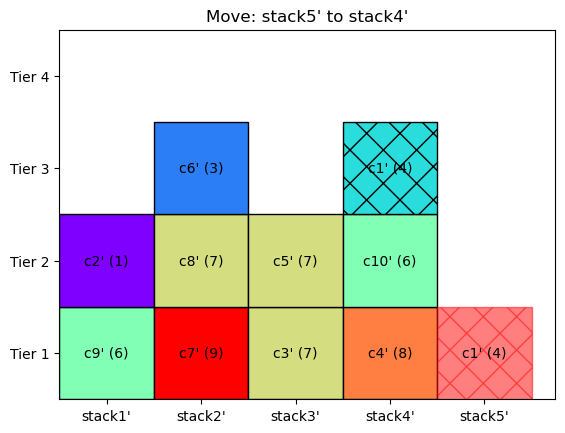

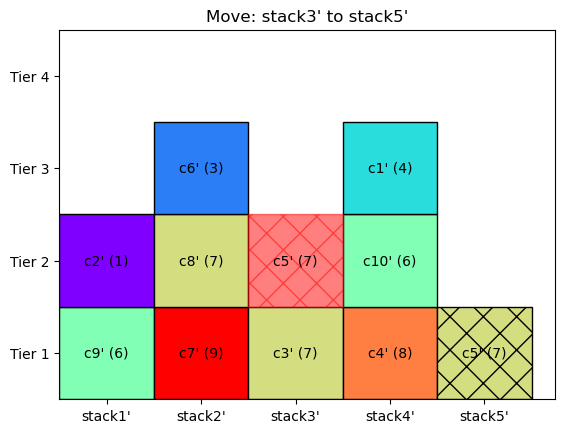

In [39]:
bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
}

P=[("stack2'", "stack1'"),
 ("stack3'", "stack4'"),
 ("stack2'", "stack1'"),
 ("stack3'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack5'", "stack3'"),
 ("stack4'", "stack3'"),
 ("stack4'", "stack2'"),
 ("stack5'", "stack4'"),
 ("stack3'", "stack4'"),
 ("stack5'", "stack4'"),
 ("stack3'", "stack5'")]

plot_bay_with_moves(bay, P, max_stacks=5, max_tiers=4)

In [44]:
def plot_bay_with_moves(bay, moves, max_stacks=5, max_tiers=4):
    for idx, move in enumerate(moves):
        # Perform the move
        source_stack, target_stack = move
        source_container = bay[source_stack].pop()
        bay[target_stack].append(source_container)
        
        # Create a plot
        fig, ax = plt.subplots()

        # Color map setup
        unique_times = set(container[1] for stack in bay.values() for container in stack)
        colors = cm.rainbow(np.linspace(0, 1, len(unique_times)))

        for i in range(max_stacks):  # loop over max_stacks, not bay.items()
            stack_name = f'stack{i+1}\''  # generate the stack_name including the apostrophe
            stack = bay.get(stack_name, [])  # use get() method to avoid KeyError
            bottom = 0
            for j, (container_id, container_time) in enumerate(stack):
                # Get color
                color_index = list(unique_times).index(container_time)
                color = colors[color_index]
                
                # Add hatch to the moved container
                hatch = '/' if stack_name == target_stack and (container_id, container_time) == source_container else None
                hatch_color = 'black' if hatch else 'black'

                ax.bar(i, 1, bottom=bottom, color=color, edgecolor=hatch_color, width=1, hatch=hatch)
                ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
                bottom += 1

        # Marking source container (empty rectangle)
        rect = patches.Rectangle((list(bay.keys()).index(source_stack) - 0.5, len(bay[source_stack])), 1, 1,
                                 edgecolor='red', facecolor='red', fill=True, alpha=0.5, hatch='/')
        ax.add_patch(rect)
        ax.text(list(bay.keys()).index(source_stack), len(bay[source_stack]) + 0.5,
                f"{source_container[0]} ({source_container[1]})", color='black', ha='center', va='center')

        ax.set_xticks(np.arange(max_stacks))  # set xticks to max_stacks
        ax.set_xticklabels([f'stack{i+1}\'' for i in range(max_stacks)])  # set xticklabels accordingly

        ax.set_yticks(np.arange(max_tiers) + 0.5)  # set yticks to max_tiers
        ax.set_yticklabels([f'Tier {i+1}' for i in range(max_tiers)])  # set yticklabels accordingly
        ax.set_xlim(left=-0.5)
        ax.set_ylim([0, max_tiers])

        plt.title(f'Move: {move[0]} to {move[1]}')
        plt.show()


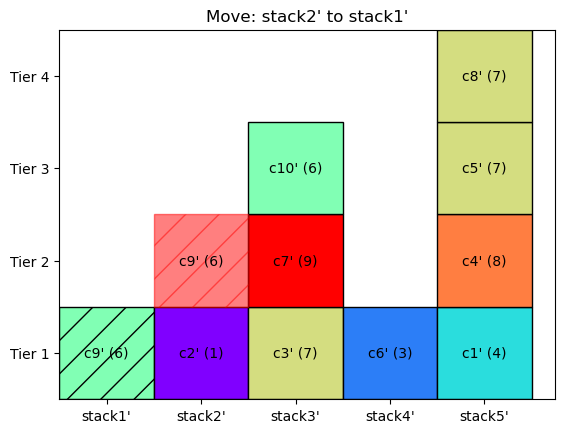

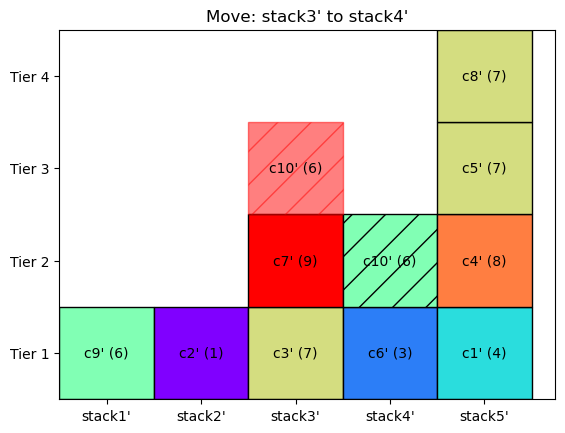

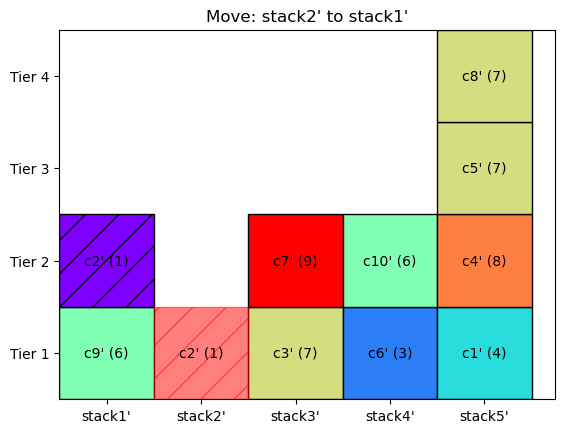

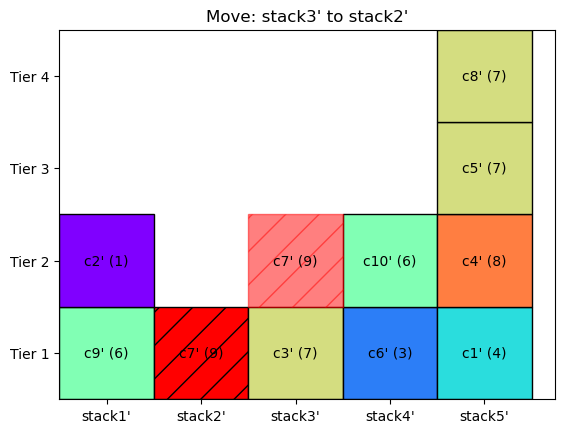

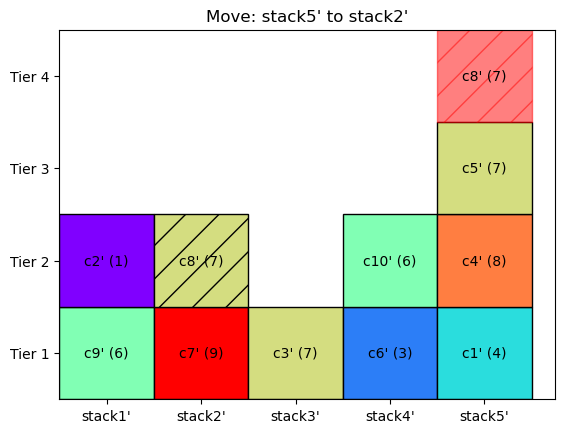

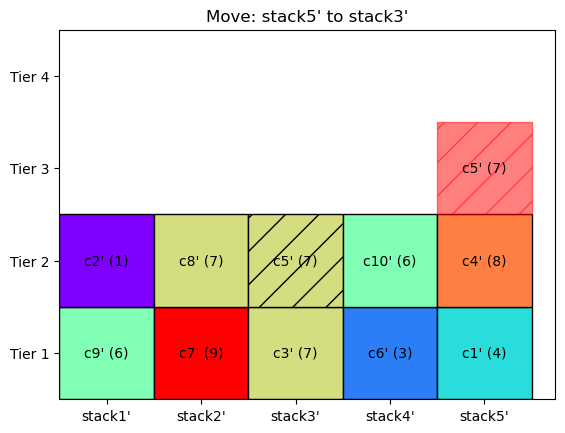

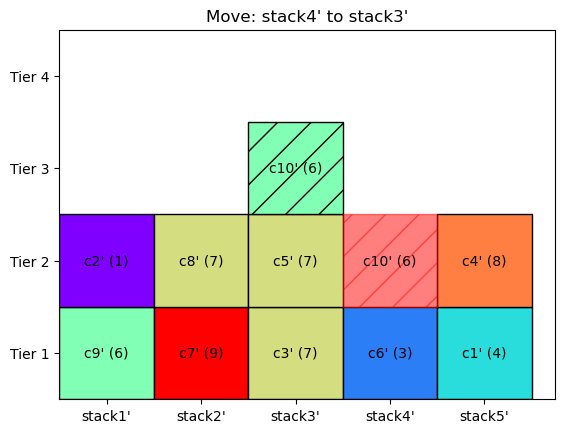

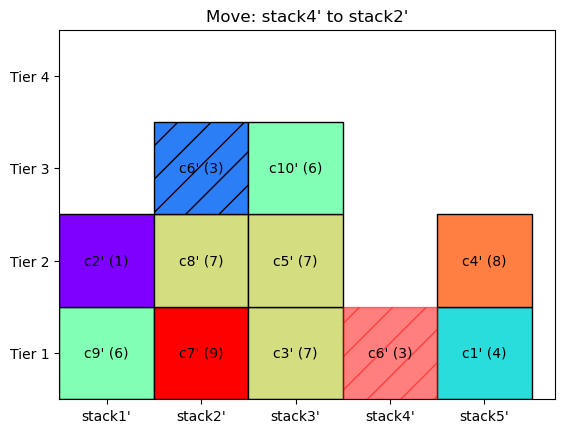

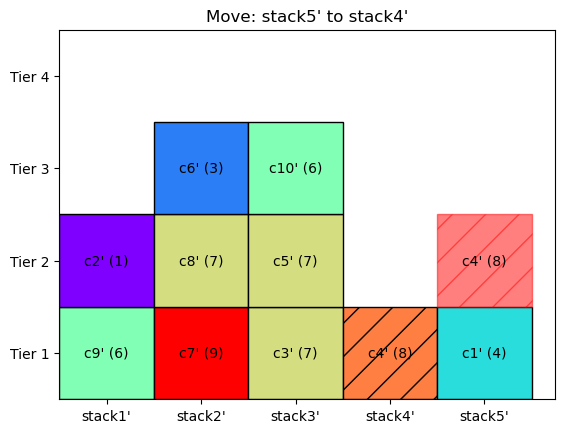

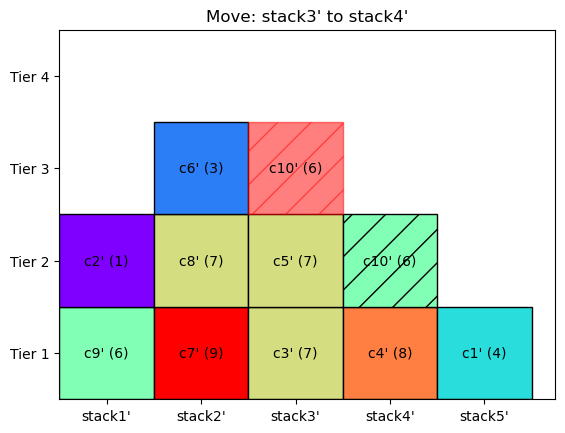

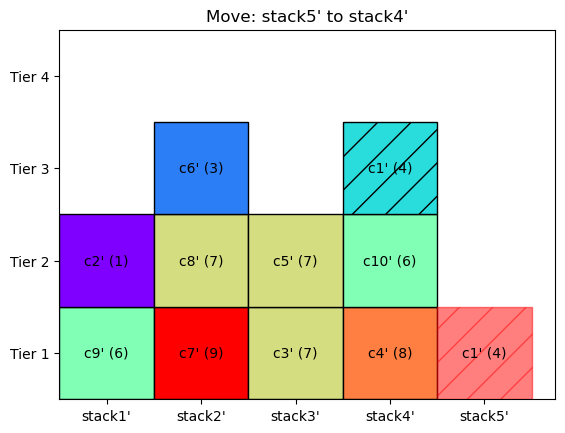

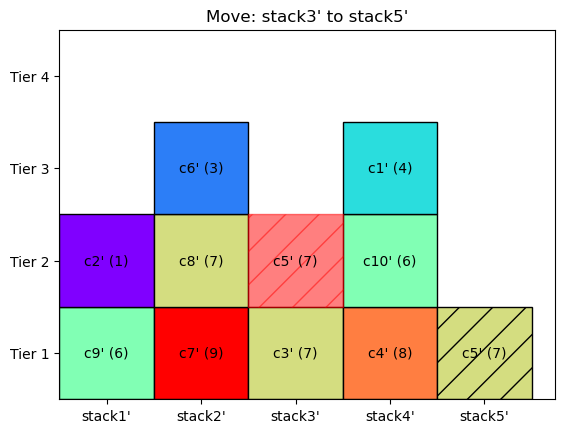

In [45]:
bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9), ("c10'", 6)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8), ("c5'", 7), ("c8'", 7)]
}

P=[("stack2'", "stack1'"),
 ("stack3'", "stack4'"),
 ("stack2'", "stack1'"),
 ("stack3'", "stack2'"),
 ("stack5'", "stack2'"),
 ("stack5'", "stack3'"),
 ("stack4'", "stack3'"),
 ("stack4'", "stack2'"),
 ("stack5'", "stack4'"),
 ("stack3'", "stack4'"),
 ("stack5'", "stack4'"),
 ("stack3'", "stack5'")]

plot_bay_with_moves(bay, P, max_stacks=5, max_tiers=4)

In [53]:
def plot_bay(bay, max_stacks=5, max_tiers=4):
    """
    plot a single bay
    """
    fig, ax = plt.subplots()

    
    # Determine the total number of unique time windows
    unique_times = set()
    for stack in bay.values():
        for container in stack:
            unique_times.add(container[1])
    num_unique_times = len(unique_times)

    # Generate a color for each unique time window
    colors = cm.rainbow(np.linspace(0, 1, num_unique_times))

    for i in range(max_stacks):  # loop over max_stacks, not bay.items()
        stack_name = f'stack{i+1}\''  # generate the stack_name including the apostrophe
        stack = bay.get(stack_name, [])  # use get() method to avoid KeyError
        bottom = 0
        for j, (container_id, container_time) in enumerate(stack):
            color_index = list(unique_times).index(container_time)
            ax.bar(i, 1, bottom=bottom, color=colors[color_index], edgecolor='black', width=1)
            ax.text(i, bottom + 0.5, f"{container_id} ({container_time})", color='black', ha='center', va='center')
            bottom += 1

    ax.set_xticks(np.arange(max_stacks))  # set xticks to max_stacks
    ax.set_xticklabels([f'stack{i+1}\'' for i in range(max_stacks)])  # set xticklabels accordingly

    ax.set_yticks(np.arange(max_tiers) + 0.5)  # set yticks to max_tiers
    ax.set_yticklabels([f'Tier {i+1}' for i in range(max_tiers)])  # set yticklabels accordingly

    plt.tick_params(
        axis='x',          
        which='both',      
        bottom=False,      
        top=False,        
        labelbottom=True)

    ax.set_xlim(left=-0.5, right=max_stacks-0.5)  # adjust right limit
    ax.set_ylim(top=max_tiers)  # adjust top limit

    plt.show()


In [54]:
bays

NameError: name 'bays' is not defined

In [61]:
bay = {
 "stack1'": [],
 "stack2'": [("c2'", 1), ("c9'", 6)],
 "stack3'": [("c3'", 7), ("c7'", 9)],
 "stack4'": [("c6'", 3)],
 "stack5'": [("c1'", 4), ("c4'", 8)]
}

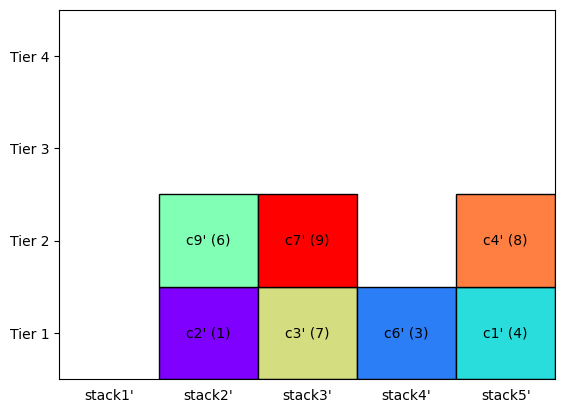

In [62]:
plot_bay(bay)

In [79]:
import random
import pandas as pd
from collections import OrderedDict

def generate_bays_data(num_bays=20, max_containers=14, min_containers=10, stacks=5, tiers=4, time_windows=8, file_name="bays_data.xlsx"):
    # Initialize list to store the bay data
    data = []

    # Generate data for num_bays bays
    for bay in range(1, num_bays+1):
        # Determine the number of containers in the bay
        num_containers = random.randint(min_containers, max_containers)
        
        # Create a dictionary to store used tiers for each stack
        used_tiers = {f'stack{i+1}': [] for i in range(stacks)}
        
        # Generate data for each container
        for container in range(1, num_containers + 1):
            container_id = f"c{container}"
            container_location_bay = bay
            
            # Randomly select a stack ensuring that the selected stack is not full
            while True:
                container_location_stack = f"stack{random.randint(1, stacks)}"
                if len(used_tiers[container_location_stack]) < tiers:
                    break
            
            # Add the tier to the used tiers in the selected stack
            container_location_tier = len(used_tiers[container_location_stack])
            used_tiers[container_location_stack].append(container_location_tier)
            
            # Randomly assign an appointment time for the container, with 90% chance of getting an appointment within the defined time window
            appointment_time = random.randint(1, time_windows + 1) if random.random() < 0.9 else 9

            # Add the container data to the list
            data.append([
                container_id,
                container_location_bay,
                container_location_stack,
                container_location_tier,
                appointment_time
            ])

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data, columns=["container_id", "container_location_bay", "container_location_stack", "container_location_tier", "appointment_time"])

    # Write the DataFrame to an Excel file
    df.to_excel(file_name, index=False, engine='openpyxl')

    # Convert the DataFrame to a bays dictionary
    bays = {}
    for idx, row in df.iterrows():
        bay = row['container_location_bay']
        stack = row['container_location_stack']
        if bay not in bays:
            bays[bay] = OrderedDict((f'stack{i+1}', []) for i in range(stacks))  # initialize all stacks
        bays[bay][stack].append((row['container_id'], row['appointment_time']))
    
    # Reorder each stack to ensure containers are arranged from bottom to top
    for bay in bays.values():
        for stack in bay.values():
            stack.sort(key=lambda x: x[1])
    
    # Return the bays dictionary
    return bays


In [80]:
bays = generate_bays_data(file_name="bays_data.xlsx")


In [78]:
bays[1]

OrderedDict([('stack1', [('c1', 6)]),
             ('stack2', []),
             ('stack3', [('c7', 7), ('c8', 7), ('c9', 4), ('c10', 8)]),
             ('stack4', [('c2', 9), ('c4', 3), ('c5', 9), ('c6', 8)]),
             ('stack5', [('c3', 6), ('c11', 2)])])

In [81]:
bays

{1: OrderedDict([('stack1', [('c11', 9)]),
              ('stack2', [('c10', 4), ('c3', 6), ('c9', 8), ('c12', 9)]),
              ('stack3', [('c8', 2), ('c1', 4)]),
              ('stack4', [('c2', 5), ('c5', 5), ('c7', 5), ('c6', 9)]),
              ('stack5', [('c4', 9)])]),
 2: OrderedDict([('stack1', []),
              ('stack2', [('c3', 2), ('c1', 6), ('c7', 8)]),
              ('stack3', [('c10', 3), ('c8', 5), ('c2', 6), ('c5', 7)]),
              ('stack4', [('c9', 1), ('c6', 5)]),
              ('stack5', [('c4', 5)])]),
 3: OrderedDict([('stack1', []),
              ('stack2', [('c1', 2), ('c12', 4)]),
              ('stack3', [('c5', 1), ('c4', 5), ('c9', 7), ('c13', 8)]),
              ('stack4', [('c6', 3), ('c7', 5), ('c10', 9)]),
              ('stack5', [('c3', 4), ('c11', 7), ('c2', 9), ('c8', 9)])]),
 4: OrderedDict([('stack1', [('c7', 9)]),
              ('stack2', [('c5', 2), ('c3', 5), ('c10', 9)]),
              ('stack3', [('c4', 6), ('c1', 7)]),
              

In [82]:
import random
import pandas as pd

def generate_bays_data(num_bays=20, max_containers=14, min_containers=10, stacks=5, tiers=4, time_windows=8, file_name="bays_data.xlsx"):
    # Initialize list to store the bay data
    data = []

    # Generate data for num_bays bays
    for bay in range(1, num_bays+1):
        # Determine the number of containers in the bay
        num_containers = random.randint(min_containers, max_containers)
        
        # Create a dictionary to store used tiers for each stack
        used_tiers = {f'stack{i+1}': [] for i in range(stacks)}
        
        # Generate data for each container
        for container in range(1, num_containers + 1):
            container_id = f"c{container}"
            container_location_bay = bay
            
            # Randomly select a stack ensuring that the selected stack is not full
            while True:
                container_location_stack = f"stack{random.randint(1, stacks)}"
                if len(used_tiers[container_location_stack]) < tiers:
                    break
            
            # Add the tier to the used tiers in the selected stack
            container_location_tier = len(used_tiers[container_location_stack])
            used_tiers[container_location_stack].append(container_location_tier)
            
            # Randomly assign an appointment time for the container, with 90% chance of getting an appointment within the defined time window
            appointment_time = random.randint(1, time_windows + 1) if random.random() < 0.9 else 9

            # Add the container data to the list
            data.append([
                container_id,
                container_location_bay,
                container_location_stack,
                container_location_tier,
                appointment_time
            ])

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data, columns=["container_id", "container_location_bay", "container_location_stack", "container_location_tier", "appointment_time"])

    # Write the DataFrame to an Excel file
    df.to_excel(file_name, index=False, engine='openpyxl')

    # Convert the DataFrame to a bays dictionary
    bays = {}
    for idx, row in df.iterrows():
        bay = row['container_location_bay']
        stack = row['container_location_stack']
        if bay not in bays:
            bays[bay] = {f'stack{i+1}': [] for i in range(stacks)}  # initialize all stacks
        bays[bay][stack].append((row['container_id'], row['appointment_time']))
    
    # Reorder each stack to ensure containers are arranged from bottom to top
    for bay in bays.values():
        for stack in bay.values():
            stack.sort(key=lambda x: x[1])
    
    # Return the bays dictionary
    return bays


In [86]:
bays = generate_bays_data(file_name="bays_data.xlsx")


In [87]:
bays

{1: {'stack1': [('c11', 1), ('c3', 4), ('c12', 7), ('c4', 8)],
  'stack2': [('c9', 8)],
  'stack3': [('c5', 1), ('c7', 8), ('c1', 9), ('c2', 9)],
  'stack4': [('c8', 1)],
  'stack5': [('c10', 1), ('c6', 6)]},
 2: {'stack1': [('c2', 2), ('c10', 2), ('c12', 2), ('c7', 7)],
  'stack2': [('c9', 2), ('c13', 2), ('c14', 9)],
  'stack3': [('c1', 1), ('c3', 9)],
  'stack4': [('c4', 4), ('c6', 6)],
  'stack5': [('c11', 1), ('c5', 2), ('c8', 9)]},
 3: {'stack1': [('c1', 9)],
  'stack2': [('c9', 6)],
  'stack3': [('c2', 4), ('c4', 5), ('c3', 8), ('c7', 9)],
  'stack4': [('c12', 7), ('c10', 8), ('c11', 9)],
  'stack5': [('c5', 1), ('c6', 3), ('c8', 8)]},
 4: {'stack1': [('c8', 7), ('c2', 8)],
  'stack2': [('c5', 1), ('c9', 5), ('c4', 6)],
  'stack3': [('c13', 2), ('c12', 3), ('c6', 6)],
  'stack4': [('c10', 2), ('c1', 5), ('c11', 6), ('c7', 8)],
  'stack5': [('c3', 1)]},
 5: {'stack1': [('c12', 4), ('c6', 6), ('c8', 6)],
  'stack2': [('c2', 4), ('c9', 7), ('c5', 8)],
  'stack3': [('c4', 2), ('c14'

In [88]:
import random
import pandas as pd
from collections import OrderedDict

def generate_bays_data(num_bays=20, max_containers=14, min_containers=10, stacks=5, tiers=4, time_windows=8, file_name="bays_data.xlsx"):
    # Initialize list to store the bay data
    data = []

    # Generate data for num_bays bays
    for bay in range(1, num_bays+1):
        # Determine the number of containers in the bay
        num_containers = random.randint(min_containers, max_containers)
        
        # Create a dictionary to store used tiers for each stack
        used_tiers = {f'stack{i+1}': [] for i in range(stacks)}
        
        # Generate data for each container
        for container in range(1, num_containers + 1):
            container_id = f"c{container}"
            container_location_bay = bay
            
            # Randomly select a stack ensuring that the selected stack is not full
            while True:
                container_location_stack = f"stack{random.randint(1, stacks)}"
                if len(used_tiers[container_location_stack]) < tiers:
                    break
            
            # Add the tier to the used tiers in the selected stack
            container_location_tier = len(used_tiers[container_location_stack])
            used_tiers[container_location_stack].append(container_location_tier)
            
            # Randomly assign an appointment time for the container, with 90% chance of getting an appointment within the defined time window
            appointment_time = random.randint(1, time_windows + 1) if random.random() < 0.9 else 9

            # Add the container data to the list
            data.append([
                container_id,
                container_location_bay,
                container_location_stack,
                container_location_tier,
                appointment_time
            ])

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data, columns=["container_id", "container_location_bay", "container_location_stack", "container_location_tier", "appointment_time"])

    # Write the DataFrame to an Excel file
    df.to_excel(file_name, index=False, engine='openpyxl')

    # Convert the DataFrame to a bays dictionary
    bays = {}
    for idx, row in df.iterrows():
        bay = row['container_location_bay']
        stack = row['container_location_stack']
        if bay not in bays:
            bays[bay] = {f'stack{i+1}': [] for i in range(stacks)}  # initialize all stacks
        bays[bay][stack].append((row['container_id'], row['appointment_time'], row['container_location_tier']))
    
    # Sort containers in each stack based on tier
    for bay in bays.values():
        for stack_containers in bay.values():
            stack_containers.sort(key=lambda x: x[2])  # sort by tier
            for i in range(len(stack_containers)):  # remove tier from container data
                stack_containers[i] = stack_containers[i][:2]  # keep only container_id and appointment_time

    # Return the bays dictionary
    return bays


In [90]:
bays = generate_bays_data(file_name="bays_data.xlsx")


In [91]:
bays

{1: {'stack1': [('c2', 7), ('c3', 5), ('c10', 1), ('c11', 3)],
  'stack2': [],
  'stack3': [('c7', 2), ('c9', 9)],
  'stack4': [('c4', 6), ('c5', 9), ('c6', 1)],
  'stack5': [('c1', 6), ('c8', 4), ('c12', 2)]},
 2: {'stack1': [('c4', 2), ('c7', 1), ('c9', 2)],
  'stack2': [('c2', 1), ('c5', 9), ('c6', 2)],
  'stack3': [('c3', 9), ('c10', 2)],
  'stack4': [('c8', 8)],
  'stack5': [('c1', 2), ('c11', 1)]},
 3: {'stack1': [('c2', 2), ('c4', 5), ('c7', 8)],
  'stack2': [('c6', 2)],
  'stack3': [('c1', 6), ('c10', 8)],
  'stack4': [('c5', 9), ('c8', 7)],
  'stack5': [('c3', 5), ('c9', 8)]},
 4: {'stack1': [('c7', 3), ('c10', 9), ('c12', 7), ('c14', 1)],
  'stack2': [('c11', 4)],
  'stack3': [('c1', 9), ('c2', 8), ('c4', 5), ('c5', 7)],
  'stack4': [('c13', 6)],
  'stack5': [('c3', 4), ('c6', 5), ('c8', 9), ('c9', 2)]},
 5: {'stack1': [('c3', 4), ('c4', 2), ('c7', 8), ('c8', 9)],
  'stack2': [('c1', 3), ('c10', 8)],
  'stack3': [('c2', 8), ('c9', 5)],
  'stack4': [],
  'stack5': [('c5', 8), 